# Towi variables correlation analysis with cognitive variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

%matplotlib inline

from IPython.core.display import HTML

def multi_table(table_list):
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [2]:
results_df = pd.read_csv("Towi_Control_Cases_Results_OK.csv")
results_df.head(3)


,Folio,1Pre-2Post,Nombre,towi_version,towi_id,buyTicketTimeOfComp,normalPackScore,reversePackScore,packTimeOfComp,timeLab2,...,unPackGroupingSample1,unPackGroupingSample2,unPackGroupingSample3,unPackGroupingSample4,unPackSpacialPrecisionSample,unPackSpacialPrecisionSample1,unPackSpacialPrecisionSample2,unPackSpacialPrecisionSample3,unPackSpacialPrecisionSample4,unPackTimeOfComp.1
0,10,1,Valeria Jehana Magaña Moreno,2,278,53,5,2,320,16.622789,...,1.0,3.0,1.0,2.0,"[0,0,0,0]",0,0,0,0,286
1,10,2,Valeria Jehana Magaña Moreno,3,278,128,4,5,542,57.421303,...,2.0,2.0,2.0,0.0,"[1,4,8,0]",1,4,8,0,291
2,11,1,Daniel Sebastian Peralta García,2,279,103,5,4,457,30.044230,...,0.0,2.0,3.0,3.0,"[3,5,4,4]",3,5,4,4,410


In [3]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 76 columns):
Folio                                    145 non-null int64
1Pre-2Post                               145 non-null int64
Nombre                                   145 non-null object
towi_version                             145 non-null int64
towi_id                                  145 non-null int64
buyTicketTimeOfComp                      145 non-null int64
normalPackScore                          145 non-null int64
reversePackScore                         145 non-null int64
packTimeOfComp                           145 non-null int64
timeLab2                                 145 non-null float64
timeLab4                                 145 non-null float64
timeLab5                                 145 non-null float64
timeOfLab 3(X)                           145 non-null float64
latLab2                                  145 non-null float64
latLab4                                  145

In [4]:
interpretation_original_df = pd.read_csv("Towi_Control_Cases_Results_Interpretation.csv")
interpretation_post_df = interpretation_original_df
interpretation_post_df.head(3)

,test_Id_Num,1-pre-2-post,initials,name,place,towi_version,towi_id,eval_date,age,school_grade,...,audioverbal_memory,selective_attention,visual_memory.1,visual_espacial_amplitude,visual_espacial_work_memory,sustained_attention,time_inhibitory_control,inhibitory_control_hit,visual_analysis,visual_synthesis
0,10,1,VJMM-CH,Valeria Jehana Magaña Moreno,CH,2,278,3-Octubre-2014,8.0,3.0,...,6.0,12,7.0,7,12,1,NaN,NaN,8,8.0
1,11,1,DSPG-CH,Daniel Sebastian Peralta García,CH,2,279,31-Octubre-2014,8.0,3.0,...,6.0,7,5.0,10,12,1,NaN,NaN,10,9.0
2,12,1,DALC-CH,David Alejandro Lino Cesário,CH,2,280,31-Octubre-2014,10.0,5.0,...,10.0,12,14.0,9,7,11,9.0,5.0,5,11.0


In [5]:
interpretation_post_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 25 columns):
test_Id_Num                    129 non-null int64
1-pre-2-post                   129 non-null int64
initials                       129 non-null object
name                           129 non-null object
place                          129 non-null object
towi_version                   129 non-null int64
towi_id                        129 non-null int64
eval_date                      128 non-null object
age                            129 non-null float64
school_grade                   127 non-null float64
gender                         129 non-null int64
attentional_amplitude          129 non-null int64
audio_verbal_work_memory       129 non-null int64
encoded_audioverbal_memory     129 non-null int64
visual_memory                  128 non-null float64
audioverbal_memory             128 non-null float64
selective_attention            129 non-null int64
visual_memory.1                12

In [6]:
merged_df = pd.merge(interpretation_post_df, results_df, how="right", on="towi_id")
merged_df.head(80)


,test_Id_Num,1-pre-2-post,initials,name,place,towi_version_x,towi_id,eval_date,age,school_grade,...,unPackGroupingSample1,unPackGroupingSample2,unPackGroupingSample3,unPackGroupingSample4,unPackSpacialPrecisionSample,unPackSpacialPrecisionSample1,unPackSpacialPrecisionSample2,unPackSpacialPrecisionSample3,unPackSpacialPrecisionSample4,unPackTimeOfComp.1
0,10.0,1.0,VJMM-CH,Valeria Jehana Magaña Moreno,CH,2.0,278,3-Octubre-2014,8.00,3.0,...,1.0,3.0,1.0,2.0,"[0,0,0,0]",0,0,0,0,286
1,10.0,2.0,VJMM-CH,Valeria Jehana Magaña Moreno,CH,2.0,278,6/Julio/2015,9.00,3.0,...,1.0,3.0,1.0,2.0,"[0,0,0,0]",0,0,0,0,286
2,10.0,1.0,VJMM-CH,Valeria Jehana Magaña Moreno,CH,2.0,278,3-Octubre-2014,8.00,3.0,...,2.0,2.0,2.0,0.0,"[1,4,8,0]",1,4,8,0,291
3,10.0,2.0,VJMM-CH,Valeria Jehana Magaña Moreno,CH,2.0,278,6/Julio/2015,9.00,3.0,...,2.0,2.0,2.0,0.0,"[1,4,8,0]",1,4,8,0,291
4,11.0,1.0,DSPG-CH,Daniel Sebastian Peralta García,CH,2.0,279,31-Octubre-2014,8.00,3.0,...,0.0,2.0,3.0,3.0,"[3,5,4,4]",3,5,4,4,410
5,11.0,2.0,DSPG-CH,Daniel Sebastian Peralta García,CH,2.0,279,2/Julio/2015,8.00,3.0,...,0.0,2.0,3.0,3.0,"[3,5,4,4]",3,5,4,4,410
6,11.0,1.0,DSPG-CH,Daniel Sebastian Peralta García,CH,2.0,279,31-Octubre-2014,8.00,3.0,...,0.0,3.0,3.0,0.0,"[0,7,6,0]",0,7,6,0,157
7,11.0,2.0,DSPG-CH,Daniel Sebastian Peralta García,CH,2.0,279,2/Julio/2015,8.00,3.0,...,0.0,3.0,3.0,0.0,"[0,7,6,0]",0,7,6,0,157
8,12.0,1.0,DALC-CH,David Alejandro Lino Cesário,CH,2.0,280,31-Octubre-2014,10.00,5.0,...,2.0,4.0,3.0,2.0,"[3,4,2,3]",3,4,2,3,319
9,12.0,2.0,DALC-CH,David Alejandro Lino Cesário,CH,2.0,280,6/Julio/2015,10.00,5.0,...,2.0,4.0,3.0,2.0,"[3,4,2,3]",3,4,2,3,319


In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 255
Data columns (total 100 columns):
test_Id_Num                              239 non-null float64
1-pre-2-post                             239 non-null float64
initials                                 239 non-null object
name                                     239 non-null object
place                                    239 non-null object
towi_version_x                           239 non-null float64
towi_id                                  256 non-null int64
eval_date                                237 non-null object
age                                      239 non-null float64
school_grade                             235 non-null float64
gender                                   239 non-null float64
attentional_amplitude                    239 non-null float64
audio_verbal_work_memory                 239 non-null float64
encoded_audioverbal_memory               239 non-null float64
visual_memory                   

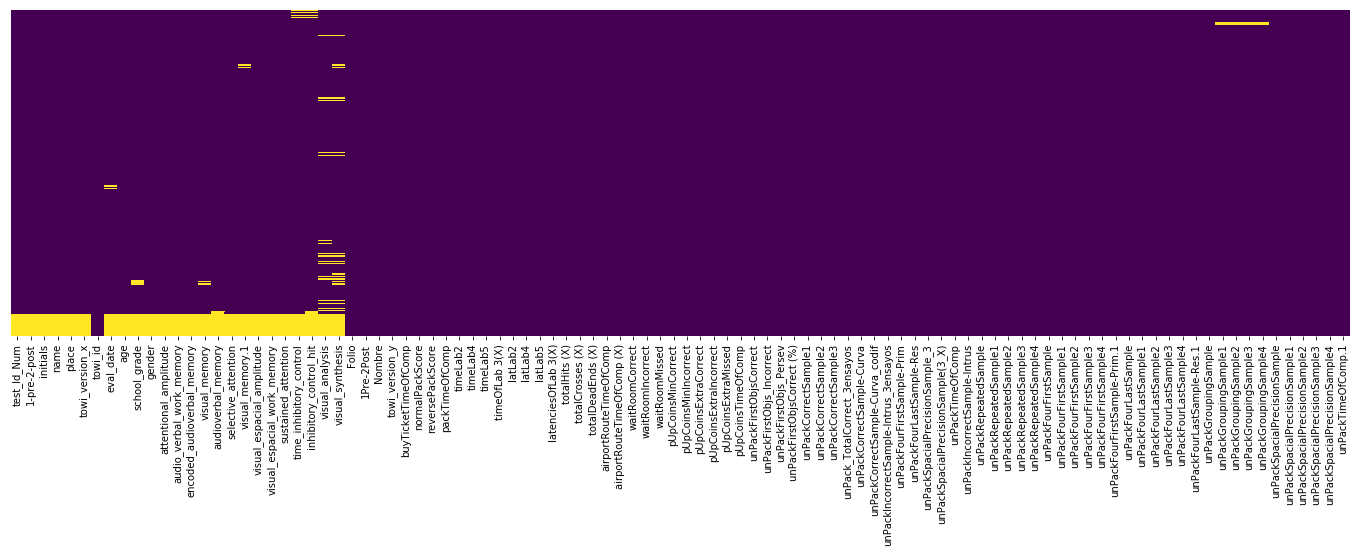

In [8]:
plt.figure(figsize=(24, 6))
sns.heatmap(merged_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
merged_df.drop("place", axis=1, inplace=True)

In [10]:
big_df = merged_df[~(merged_df['visual_analysis'].isnull() | merged_df['visual_synthesis'].isnull() | merged_df['unPackGroupingSample1'].isnull())]
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 238
Data columns (total 99 columns):
test_Id_Num                              215 non-null float64
1-pre-2-post                             215 non-null float64
initials                                 215 non-null object
name                                     215 non-null object
towi_version_x                           215 non-null float64
towi_id                                  215 non-null int64
eval_date                                213 non-null object
age                                      215 non-null float64
school_grade                             213 non-null float64
gender                                   215 non-null float64
attentional_amplitude                    215 non-null float64
audio_verbal_work_memory                 215 non-null float64
encoded_audioverbal_memory               215 non-null float64
visual_memory                            215 non-null float64
audioverbal_memory              

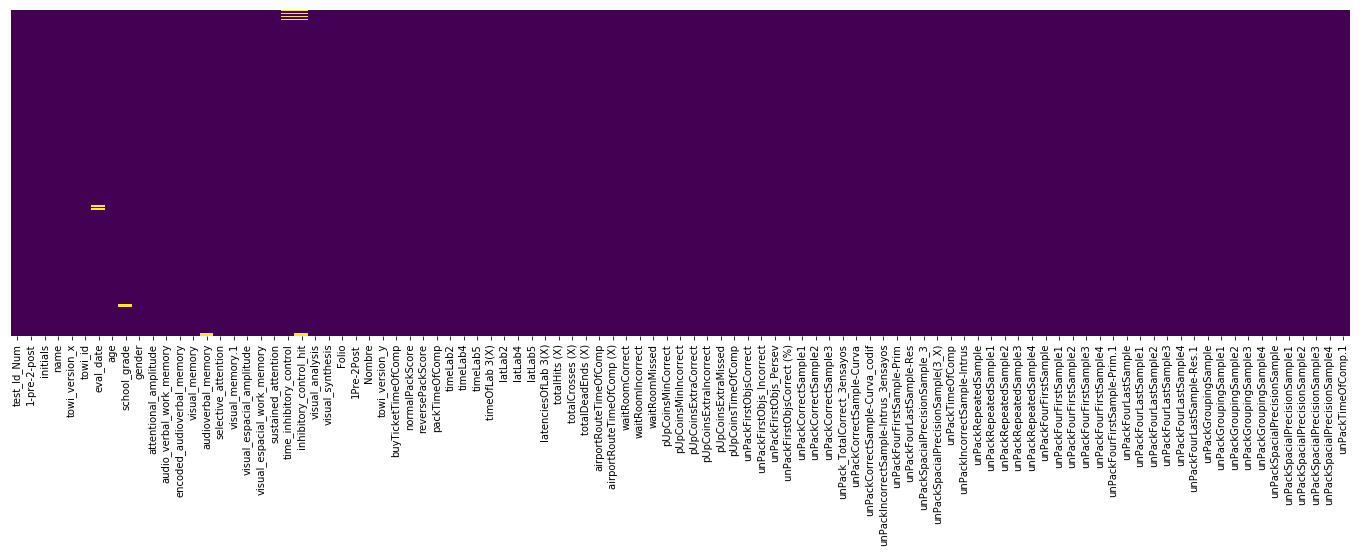

In [11]:
plt.figure(figsize=(24, 6))
sns.heatmap(big_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Working...


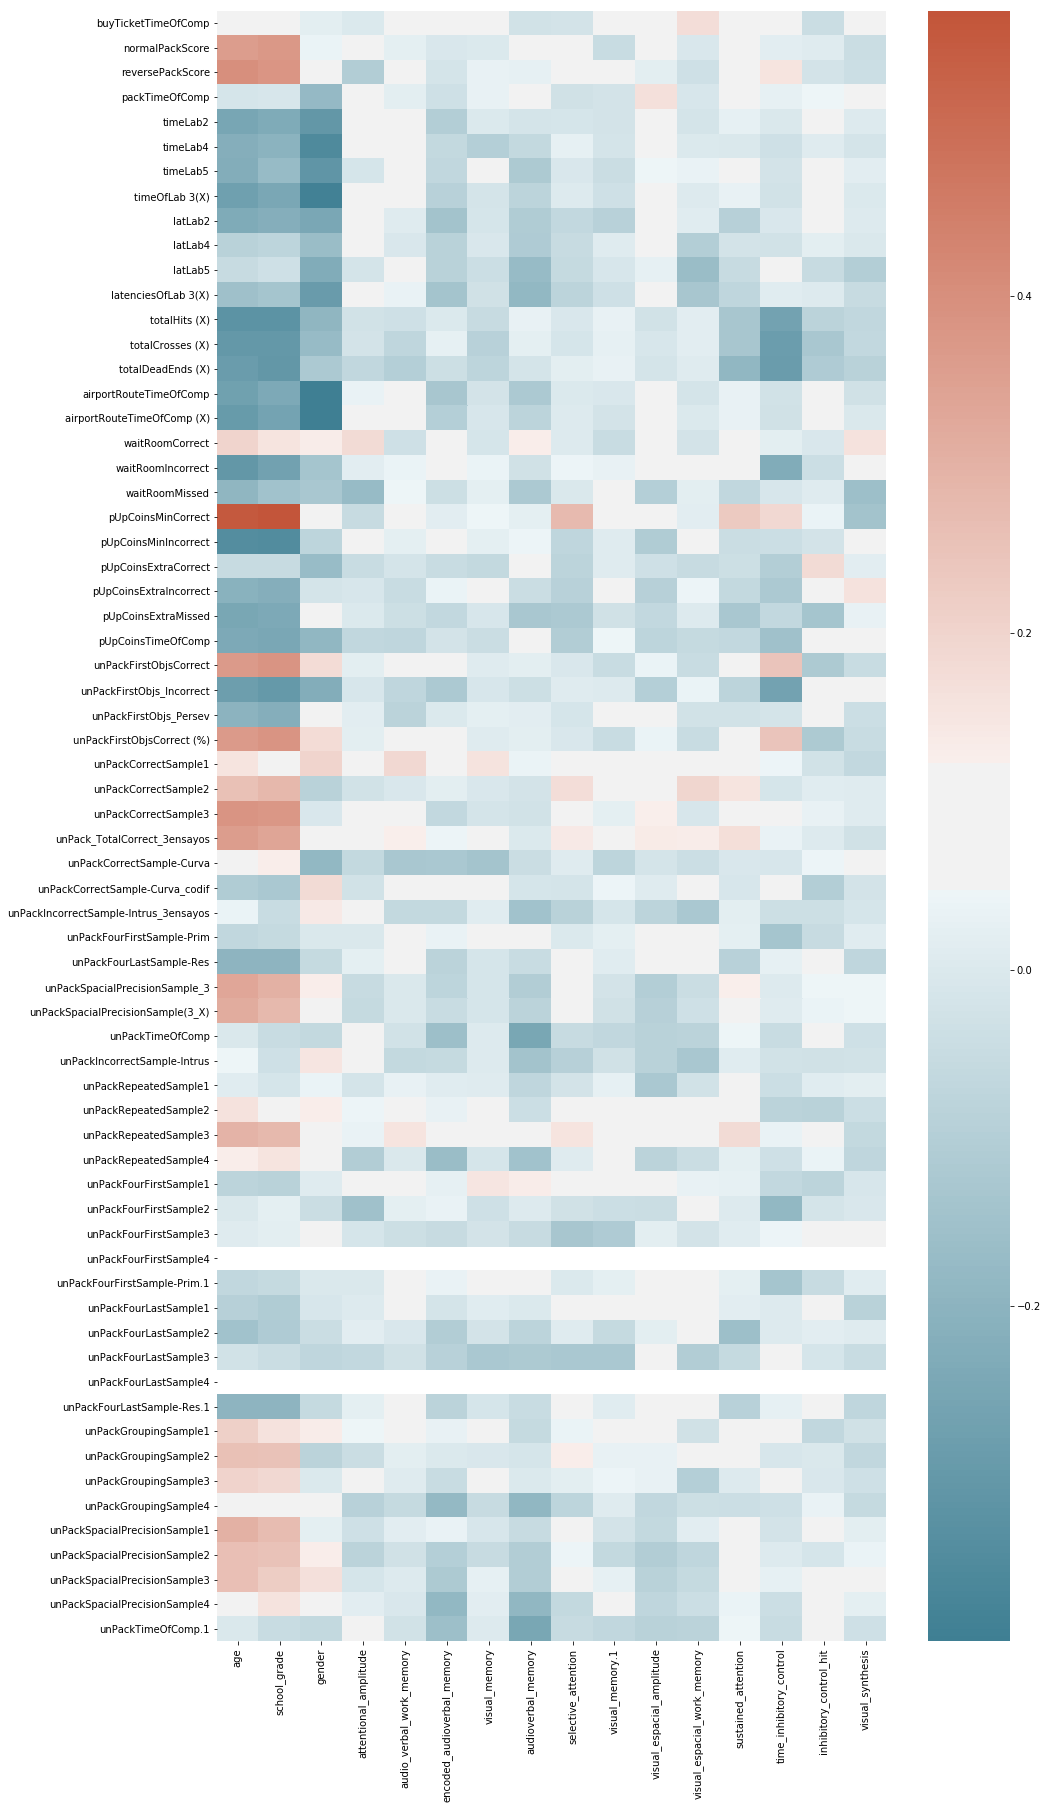

In [12]:
fig, ax = plt.subplots(figsize=(15,30))
pallete = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
big_df_corr = big_df.corr().iloc[23:, 4:20]
sns.heatmap(big_df_corr, ax = ax, cmap = pallete)
print("Working...")

In [13]:
def plot_all_interpretations(df):
    print("Working...")
    for column in df:
        plt.subplots(figsize=(25,2))
        plt.gca().set_title(column)
        sns.heatmap(df[[column]].sort_values(by=column, ascending=True).T, cmap = pallete)

Working...


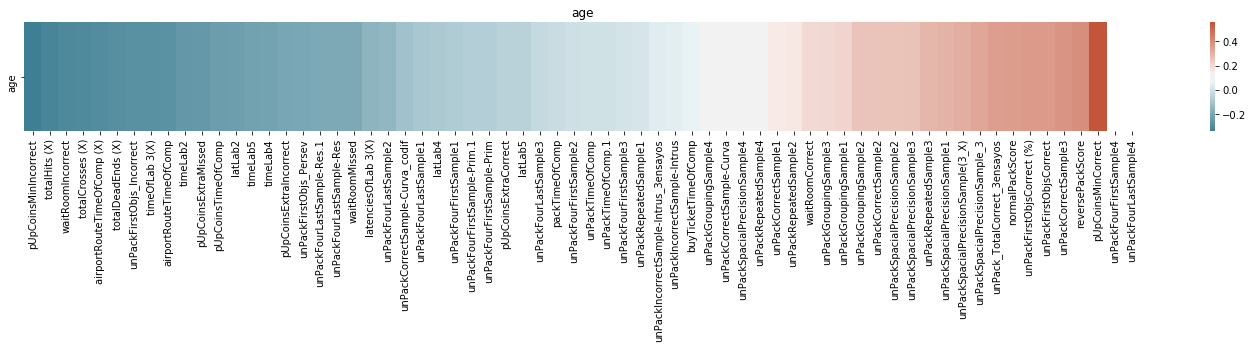

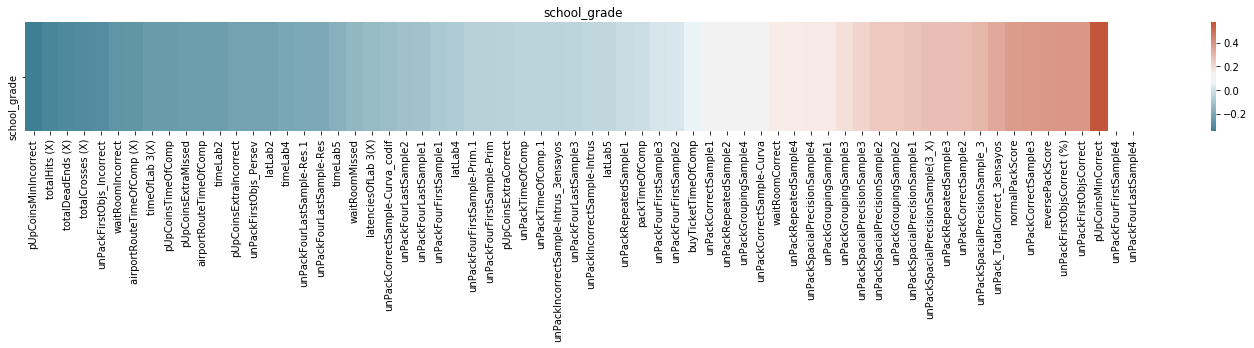

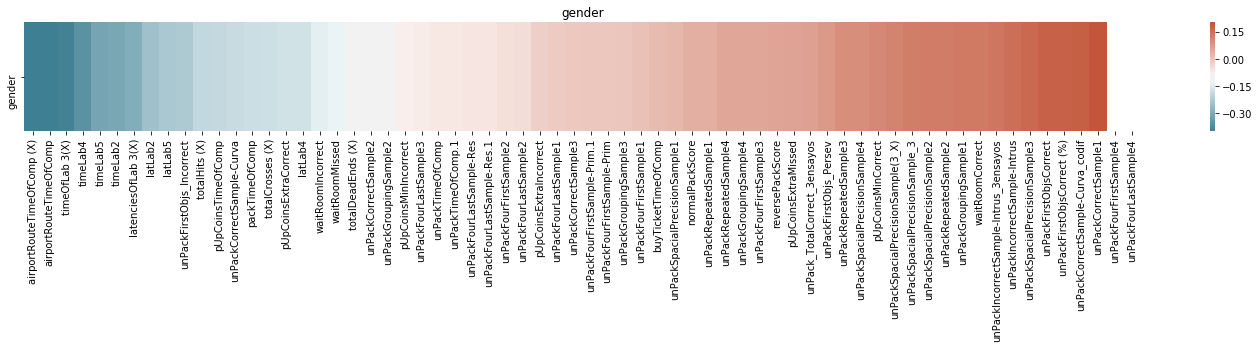

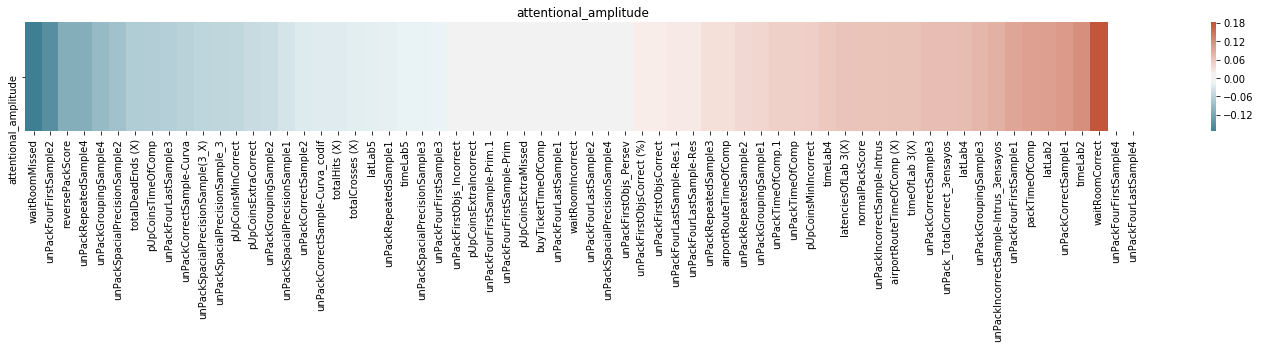

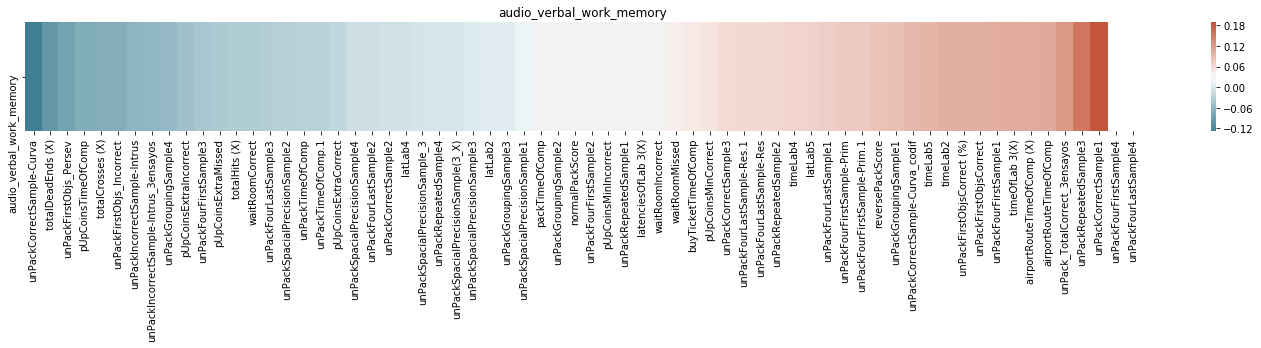

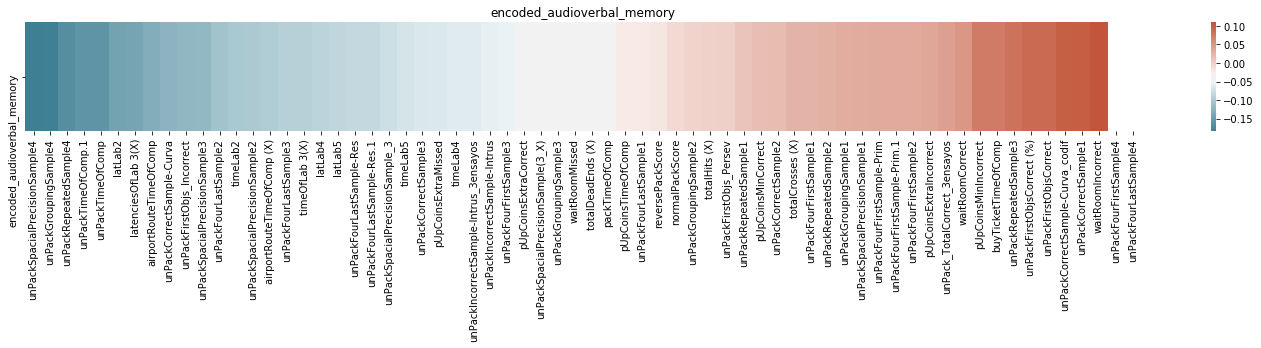

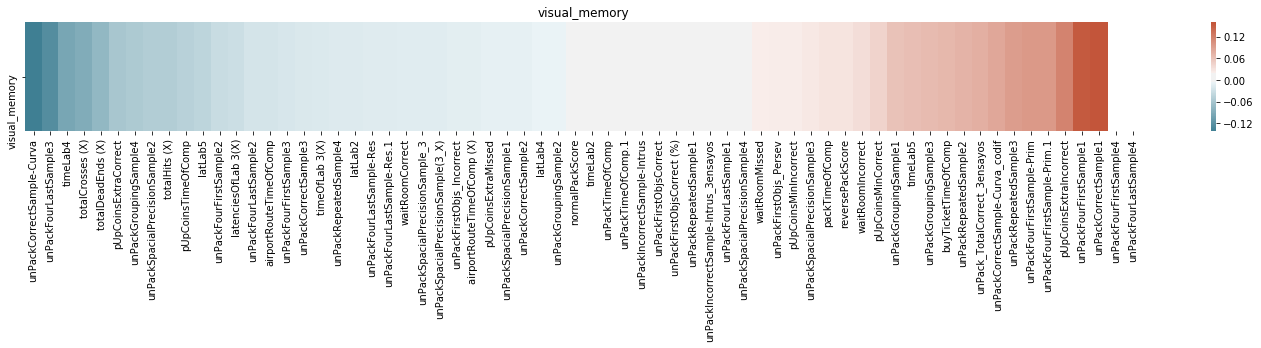

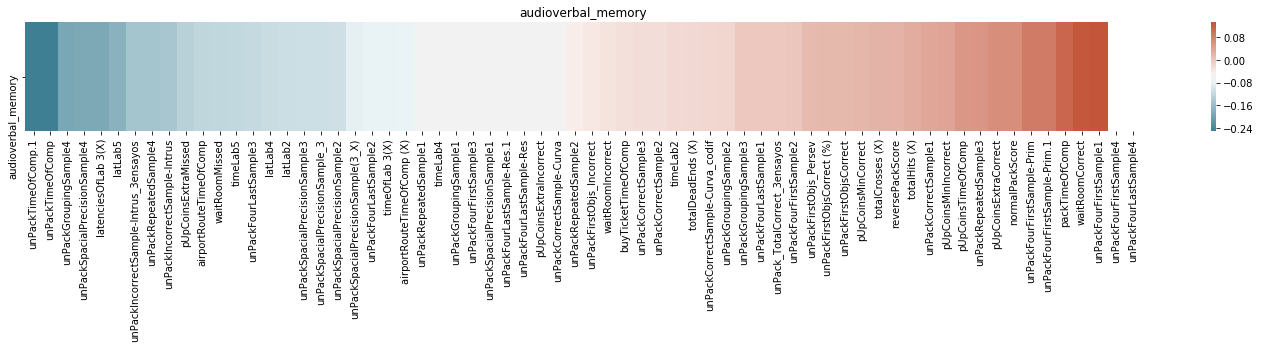

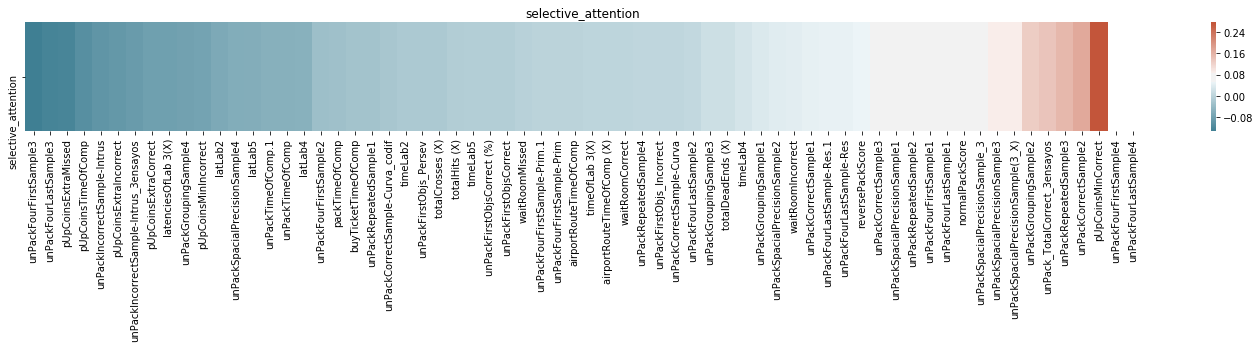

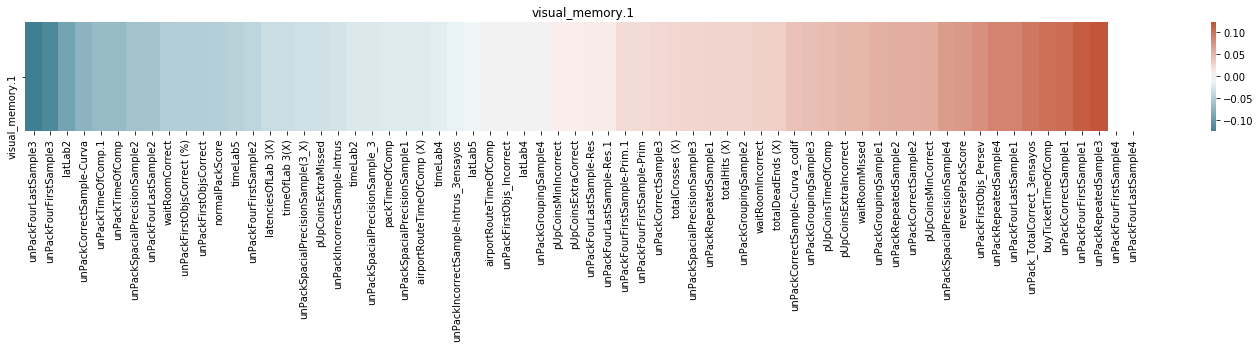

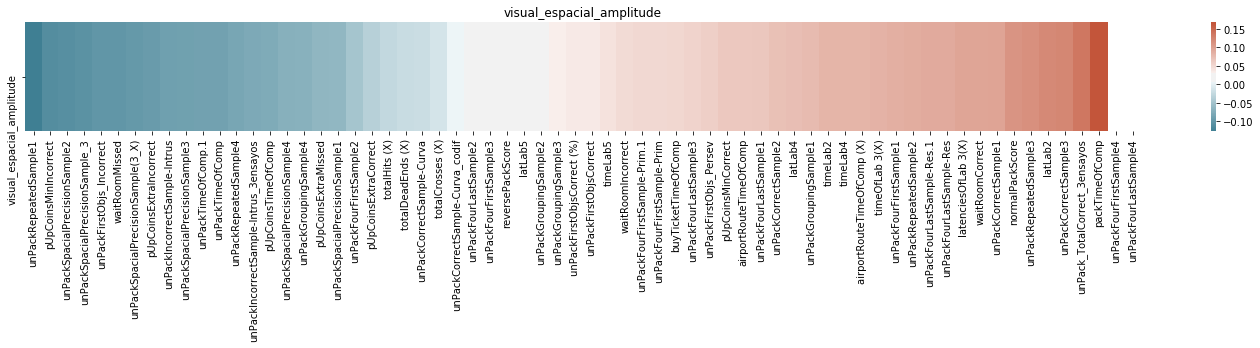

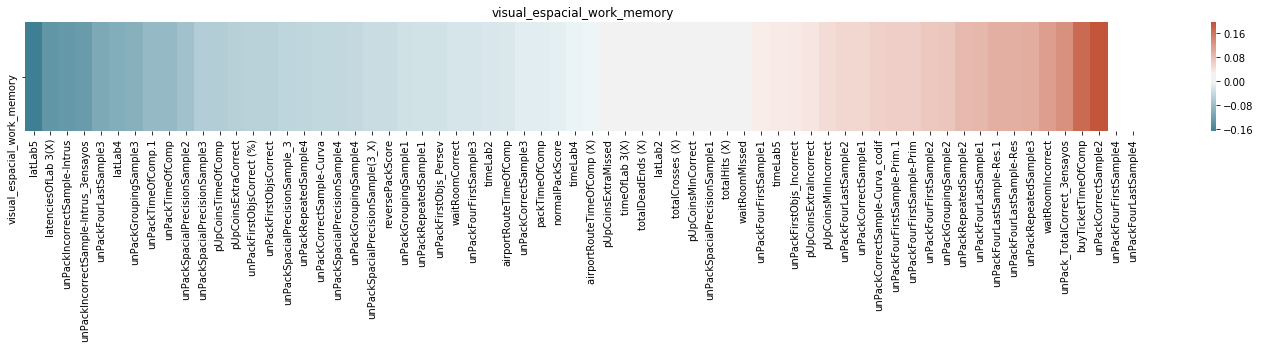

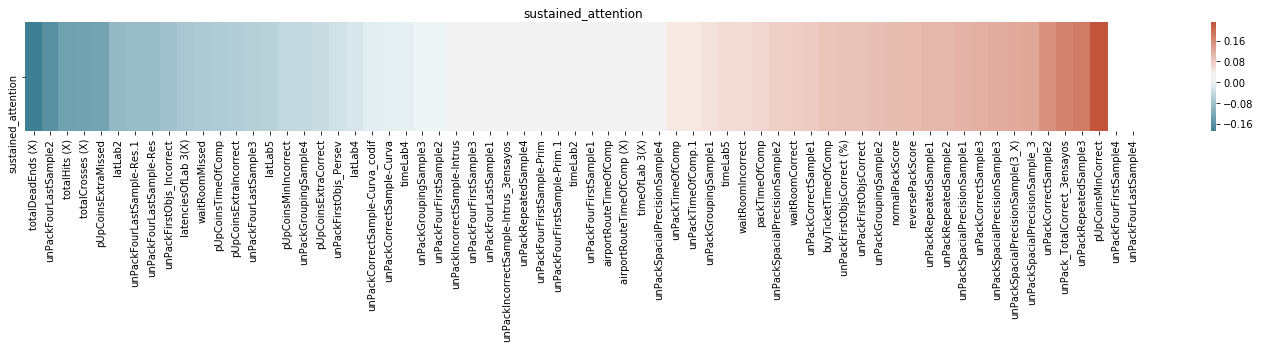

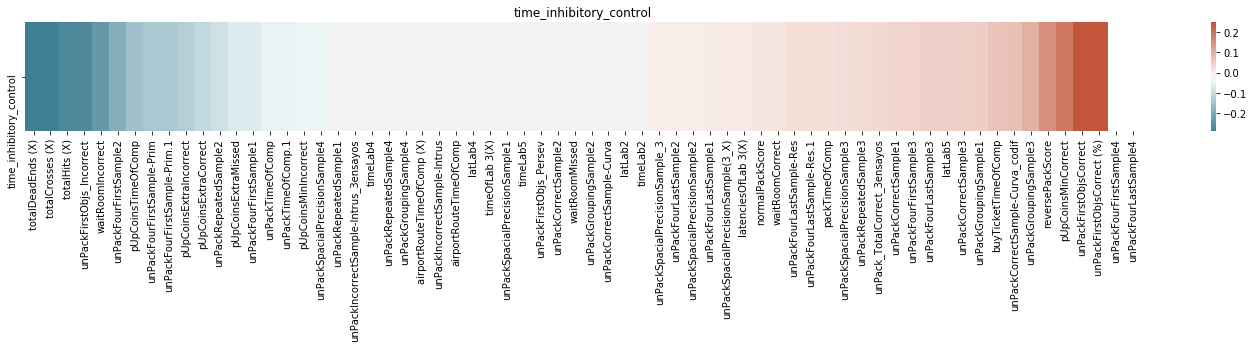

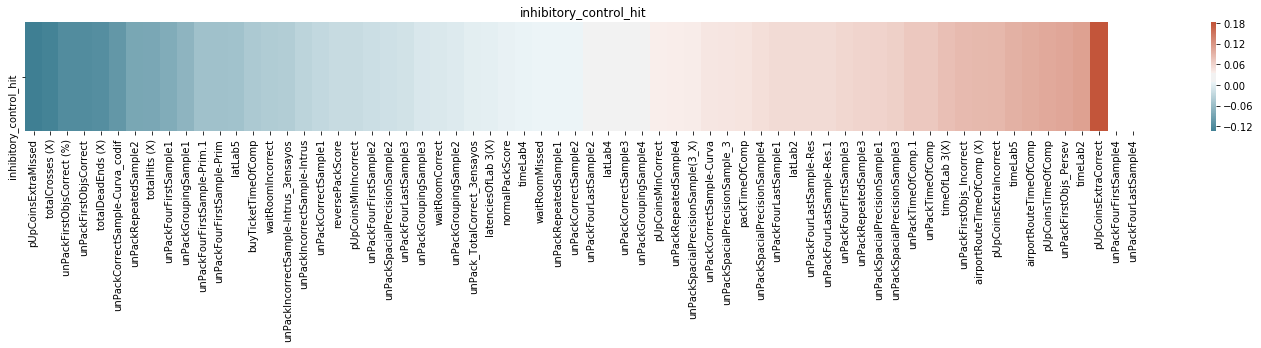

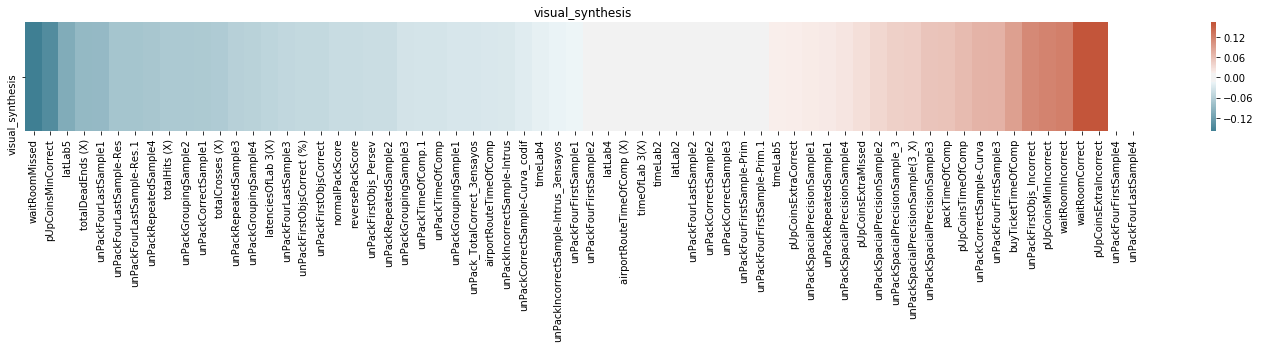

In [14]:
plot_all_interpretations(big_df_corr)

In [15]:
vars_in_game = pd.read_csv("Games_Variables.csv")
vars_in_game.head(3)
def get_games(col):
    return vars_in_game[[col.index]]
    
def plot_all_interpretations(df, vars_in_game):
    print("Working...")
    for column in df:
        a = df[[column]].sort_values(by=column, ascending=True).head(10)
        b = df[[column]].sort_values(by=column, ascending=False).head(10)
        c = []
        d = []
        for index in a.index:
            c.append(vars_in_game[index].iloc[0])
        for index in b.index:
            d.append(vars_in_game[index].iloc[0])
        a["game"] = c
        b["game"] = d
        display(multi_table([a,b]))
        f = a.groupby(["game"]).mean()
        g = b.groupby(["game"]).mean()
        display(multi_table([f,g]))
    print("Done.")

In [16]:
plot_all_interpretations(big_df_corr, vars_in_game)

Working...


,age,game
pUpCoinsMinIncorrect,-0.343604,pick_up_coins
totalHits (X),-0.320723,labs
waitRoomIncorrect,-0.305757,waiting_room
totalCrosses (X),-0.301620,labs
airportRouteTimeOfComp (X),-0.295272,driving_to_airport
totalDeadEnds (X),-0.286391,labs
unPackFirstObjs_Incorrect,-0.279297,Unpack
timeOfLab 3(X),-0.277745,labs
airportRouteTimeOfComp,-0.273518,driving_to_airport
timeLab2,-0.254348,driving_to_airport


,age
game,
Unpack,-0.279297
driving_to_airport,-0.274379
labs,-0.296620
pick_up_coins,-0.343604
waiting_room,-0.305757
,age
game,
Unpack,0.367642
arrange_the_room,0.344082


,school_grade,game
pUpCoinsMinIncorrect,-0.348191,pick_up_coins
totalHits (X),-0.322661,labs
totalDeadEnds (X),-0.305519,labs
totalCrosses (X),-0.301687,labs
unPackFirstObjs_Incorrect,-0.297927,Unpack
waitRoomIncorrect,-0.268586,waiting_room
airportRouteTimeOfComp (X),-0.262859,driving_to_airport
timeOfLab 3(X),-0.247082,labs
pUpCoinsTimeOfComp,-0.245457,pick_up_coins
pUpCoinsExtraMissed,-0.238844,pick_up_coins


,school_grade
game,
Unpack,-0.297927
driving_to_airport,-0.262859
labs,-0.294238
pick_up_coins,-0.277497
waiting_room,-0.268586
,school_grade
game,
Unpack,0.388014
arrange_the_room,0.328089


,gender,game
airportRouteTimeOfComp (X),-0.399169,driving_to_airport
airportRouteTimeOfComp,-0.397013,driving_to_airport
timeOfLab 3(X),-0.391211,labs
timeLab4,-0.354317,driving_to_airport
timeLab5,-0.312293,driving_to_airport
timeLab2,-0.305448,driving_to_airport
latenciesOfLab 3(X),-0.292352,labs
latLab2,-0.244701,driving_to_airport
latLab5,-0.228955,driving_to_airport
unPackFirstObjs_Incorrect,-0.224690,Unpack


,gender
game,
Unpack,-0.224690
driving_to_airport,-0.320271
labs,-0.341781
,gender
game,
Unpack,0.176397
arrange_the_room,0.160372
waiting_room,0.133949


,attentional_amplitude,game
waitRoomMissed,-0.173730,waiting_room
unPackFourFirstSample2,-0.150217,arrange_the_room
reversePackScore,-0.107680,packing
unPackRepeatedSample4,-0.107491,arrange_the_room
unPackGroupingSample4,-0.091635,arrange_the_room
unPackSpacialPrecisionSample2,-0.082067,arrange_the_room
totalDeadEnds (X),-0.067349,labs
pUpCoinsTimeOfComp,-0.067063,pick_up_coins
unPackFourLastSample3,-0.063067,arrange_the_room
unPackCorrectSample-Curva,-0.059786,arrange_the_room


,attentional_amplitude
game,
arrange_the_room,-0.092377
labs,-0.067349
packing,-0.107680
pick_up_coins,-0.067063
waiting_room,-0.173730
,attentional_amplitude
game,
arrange_the_room,0.086352
driving_to_airport,0.096921


,audio_verbal_work_memory,game
unPackCorrectSample-Curva,-0.128135,arrange_the_room
totalDeadEnds (X),-0.097330,labs
unPackFirstObjs_Persev,-0.084273,Unpack
pUpCoinsTimeOfComp,-0.072912,pick_up_coins
totalCrosses (X),-0.070904,labs
unPackFirstObjs_Incorrect,-0.070759,Unpack
unPackIncorrectSample-Intrus,-0.061442,arrange_the_room
unPackIncorrectSample-Intrus_3ensayos,-0.060636,arrange_the_room
unPackGroupingSample4,-0.055430,arrange_the_room
pUpCoinsExtraIncorrect,-0.048548,pick_up_coins


,audio_verbal_work_memory
game,
Unpack,-0.077516
arrange_the_room,-0.076411
labs,-0.084117
pick_up_coins,-0.060730
,audio_verbal_work_memory
game,
Unpack,0.104274
arrange_the_room,0.135706
driving_to_airport,0.106386


,encoded_audioverbal_memory,game
unPackSpacialPrecisionSample4,-0.183666,arrange_the_room
unPackGroupingSample4,-0.181992,arrange_the_room
unPackRepeatedSample4,-0.166336,arrange_the_room
unPackTimeOfComp.1,-0.159167,arrange_the_room
unPackTimeOfComp,-0.159167,arrange_the_room
latLab2,-0.142947,driving_to_airport
latenciesOfLab 3(X),-0.140458,labs
airportRouteTimeOfComp,-0.131547,driving_to_airport
unPackCorrectSample-Curva,-0.123199,arrange_the_room
unPackFirstObjs_Incorrect,-0.120604,Unpack


,encoded_audioverbal_memory
game,
Unpack,-0.120604
arrange_the_room,-0.162254
driving_to_airport,-0.137247
labs,-0.140458
,encoded_audioverbal_memory
game,
Unpack,0.090449
arrange_the_room,0.083114
boarding_pass,0.075667


,visual_memory,game
unPackCorrectSample-Curva,-0.141703,arrange_the_room
unPackFourLastSample3,-0.124476,arrange_the_room
timeLab4,-0.097051,driving_to_airport
totalCrosses (X),-0.089035,labs
totalDeadEnds (X),-0.075388,labs
pUpCoinsExtraCorrect,-0.058746,pick_up_coins
unPackGroupingSample4,-0.054507,arrange_the_room
unPackSpacialPrecisionSample2,-0.051139,arrange_the_room
totalHits (X),-0.051017,labs
pUpCoinsTimeOfComp,-0.046225,pick_up_coins


,visual_memory
game,
arrange_the_room,-0.092956
driving_to_airport,-0.097051
labs,-0.071813
pick_up_coins,-0.052486
,visual_memory
game,
arrange_the_room,0.104199
boarding_pass,0.070159
pick_up_coins,0.116987


,audioverbal_memory,game
unPackTimeOfComp.1,-0.250544,arrange_the_room
unPackTimeOfComp,-0.250544,arrange_the_room
unPackGroupingSample4,-0.190237,arrange_the_room
unPackSpacialPrecisionSample4,-0.187214,arrange_the_room
latenciesOfLab 3(X),-0.186692,labs
latLab5,-0.175033,driving_to_airport
unPackIncorrectSample-Intrus_3ensayos,-0.146992,arrange_the_room
unPackRepeatedSample4,-0.146497,arrange_the_room
unPackIncorrectSample-Intrus,-0.144623,arrange_the_room
pUpCoinsExtraMissed,-0.128782,pick_up_coins


,audioverbal_memory
game,
arrange_the_room,-0.188093
driving_to_airport,-0.175033
labs,-0.186692
pick_up_coins,-0.128782
,audioverbal_memory
game,
arrange_the_room,0.091312
packing,0.089497
pick_up_coins,0.055497


,selective_attention,game
unPackFourFirstSample3,-0.131429,arrange_the_room
unPackFourLastSample3,-0.123245,arrange_the_room
pUpCoinsExtraMissed,-0.121152,pick_up_coins
pUpCoinsTimeOfComp,-0.104856,pick_up_coins
unPackIncorrectSample-Intrus,-0.096085,arrange_the_room
pUpCoinsExtraIncorrect,-0.090198,pick_up_coins
unPackIncorrectSample-Intrus_3ensayos,-0.086865,arrange_the_room
pUpCoinsExtraCorrect,-0.079729,pick_up_coins
latenciesOfLab 3(X),-0.079462,labs
unPackGroupingSample4,-0.075831,arrange_the_room


,selective_attention
game,
arrange_the_room,-0.102691
labs,-0.079462
pick_up_coins,-0.098984
,selective_attention
game,
arrange_the_room,0.116673
packing,0.078170
pick_up_coins,0.275376


,visual_memory.1,game
unPackFourLastSample3,-0.124550,arrange_the_room
unPackFourFirstSample3,-0.114435,arrange_the_room
latLab2,-0.089047,driving_to_airport
unPackCorrectSample-Curva,-0.074357,arrange_the_room
unPackTimeOfComp.1,-0.067102,arrange_the_room
unPackTimeOfComp,-0.067102,arrange_the_room
unPackSpacialPrecisionSample2,-0.059672,arrange_the_room
unPackFourLastSample2,-0.058230,arrange_the_room
waitRoomCorrect,-0.049409,waiting_room
unPackFirstObjsCorrect (%),-0.048840,Unpack


,visual_memory.1
game,
Unpack,-0.048840
arrange_the_room,-0.080778
driving_to_airport,-0.089047
waiting_room,-0.049409
,visual_memory.1
game,
Unpack,0.078295
arrange_the_room,0.097843
boarding_pass,0.101353


,visual_espacial_amplitude,game
unPackRepeatedSample1,-0.126225,arrange_the_room
pUpCoinsMinIncorrect,-0.110093,pick_up_coins
unPackSpacialPrecisionSample2,-0.106963,arrange_the_room
unPackSpacialPrecisionSample_3,-0.103897,arrange_the_room
unPackFirstObjs_Incorrect,-0.099540,Unpack
waitRoomMissed,-0.098796,waiting_room
unPackSpacialPrecisionSample(3_X),-0.095852,arrange_the_room
pUpCoinsExtraIncorrect,-0.094033,pick_up_coins
unPackIncorrectSample-Intrus,-0.088756,arrange_the_room
unPackSpacialPrecisionSample3,-0.087350,arrange_the_room


,visual_espacial_amplitude
game,
Unpack,-0.099540
arrange_the_room,-0.101507
pick_up_coins,-0.102063
waiting_room,-0.098796
,visual_espacial_amplitude
game,
arrange_the_room,0.113337
driving_to_airport,0.121383
labs,0.096623


,visual_espacial_work_memory,game
latLab5,-0.165837,driving_to_airport
latenciesOfLab 3(X),-0.133109,labs
unPackIncorrectSample-Intrus,-0.128958,arrange_the_room
unPackIncorrectSample-Intrus_3ensayos,-0.125706,arrange_the_room
unPackFourLastSample3,-0.105659,arrange_the_room
latLab4,-0.101486,driving_to_airport
unPackGroupingSample3,-0.097556,arrange_the_room
unPackTimeOfComp.1,-0.083115,arrange_the_room
unPackTimeOfComp,-0.083115,arrange_the_room
unPackSpacialPrecisionSample2,-0.070968,arrange_the_room


,visual_espacial_work_memory
game,
arrange_the_room,-0.099297
driving_to_airport,-0.133661
labs,-0.133109
,visual_espacial_work_memory
game,
arrange_the_room,0.109295
boarding_pass,0.173641
waiting_room,0.116651


,sustained_attention,game
totalDeadEnds (X),-0.188632,labs
unPackFourLastSample2,-0.159849,arrange_the_room
totalHits (X),-0.133921,labs
totalCrosses (X),-0.132553,labs
pUpCoinsExtraMissed,-0.128368,pick_up_coins
latLab2,-0.094375,driving_to_airport
unPackFourLastSample-Res.1,-0.089896,arrange_the_room
unPackFourLastSample-Res,-0.089896,arrange_the_room
unPackFirstObjs_Incorrect,-0.080400,Unpack
latenciesOfLab 3(X),-0.071919,labs


,sustained_attention
game,
Unpack,-0.080400
arrange_the_room,-0.113214
driving_to_airport,-0.094375
labs,-0.131756
pick_up_coins,-0.128368
,sustained_attention
game,
arrange_the_room,0.135078
pick_up_coins,0.229966


,time_inhibitory_control,game
totalDeadEnds (X),-0.287013,labs
totalCrosses (X),-0.285378,labs
totalHits (X),-0.266631,labs
unPackFirstObjs_Incorrect,-0.264337,Unpack
waitRoomIncorrect,-0.232101,waiting_room
unPackFourFirstSample2,-0.187049,arrange_the_room
pUpCoinsTimeOfComp,-0.149515,pick_up_coins
unPackFourFirstSample-Prim,-0.136741,arrange_the_room
unPackFourFirstSample-Prim.1,-0.136741,arrange_the_room
pUpCoinsExtraIncorrect,-0.120194,pick_up_coins


,time_inhibitory_control
game,
Unpack,-0.264337
arrange_the_room,-0.153510
labs,-0.279674
pick_up_coins,-0.134855
waiting_room,-0.232101
,time_inhibitory_control
game,
Unpack,0.247027
arrange_the_room,0.106289


,inhibitory_control_hit,game
pUpCoinsExtraMissed,-0.134386,pick_up_coins
totalCrosses (X),-0.128483,labs
unPackFirstObjsCorrect (%),-0.118062,Unpack
unPackFirstObjsCorrect,-0.118062,arrange_the_room
totalDeadEnds (X),-0.114913,labs
unPackCorrectSample-Curva_codif,-0.103637,arrange_the_room
unPackRepeatedSample2,-0.085268,arrange_the_room
totalHits (X),-0.084831,labs
unPackFourFirstSample1,-0.079437,arrange_the_room
unPackGroupingSample1,-0.068834,arrange_the_room


,inhibitory_control_hit
game,
Unpack,-0.118062
arrange_the_room,-0.091048
labs,-0.109409
pick_up_coins,-0.134386
,inhibitory_control_hit
game,
Unpack,0.095148
driving_to_airport,0.096974
labs,0.080777


,visual_synthesis,game
waitRoomMissed,-0.159715,waiting_room
pUpCoinsMinCorrect,-0.142621,pick_up_coins
latLab5,-0.103342,driving_to_airport
totalDeadEnds (X),-0.087700,labs
unPackFourLastSample1,-0.086123,arrange_the_room
unPackFourLastSample-Res,-0.071709,arrange_the_room
unPackFourLastSample-Res.1,-0.071709,arrange_the_room
unPackRepeatedSample4,-0.070994,arrange_the_room
totalHits (X),-0.067661,labs
unPackGroupingSample2,-0.066752,arrange_the_room


,visual_synthesis
game,
arrange_the_room,-0.073458
driving_to_airport,-0.103342
labs,-0.077681
pick_up_coins,-0.142621
waiting_room,-0.159715
,visual_synthesis
game,
Unpack,0.111673
arrange_the_room,0.072029


Done.


In [17]:
big_df_corr_kendall = big_df.corr(method='kendall').iloc[23:, 4:20]


In [18]:
plot_all_interpretations(big_df_corr_kendall, vars_in_game)

Working...


,age,game
totalHits (X),-0.292112,labs
waitRoomIncorrect,-0.288760,waiting_room
totalCrosses (X),-0.267815,labs
totalDeadEnds (X),-0.242971,labs
pUpCoinsMinIncorrect,-0.241287,pick_up_coins
pUpCoinsExtraIncorrect,-0.241259,pick_up_coins
unPackFirstObjs_Incorrect,-0.233883,Unpack
waitRoomMissed,-0.228640,waiting_room
latLab2,-0.208626,driving_to_airport
pUpCoinsTimeOfComp,-0.192966,pick_up_coins


,age
game,
Unpack,-0.233883
driving_to_airport,-0.208626
labs,-0.267633
pick_up_coins,-0.225171
waiting_room,-0.258700
,age
game,
Unpack,0.304491
arrange_the_room,0.291172


,school_grade,game
totalHits (X),-0.303266,labs
totalCrosses (X),-0.290638,labs
waitRoomIncorrect,-0.288188,waiting_room
totalDeadEnds (X),-0.276710,labs
pUpCoinsMinIncorrect,-0.273892,pick_up_coins
pUpCoinsExtraIncorrect,-0.265375,pick_up_coins
unPackFirstObjs_Incorrect,-0.254493,Unpack
latLab2,-0.210120,driving_to_airport
waitRoomMissed,-0.202592,waiting_room
unPackFourLastSample-Res.1,-0.186045,arrange_the_room


,school_grade
game,
Unpack,-0.254493
arrange_the_room,-0.186045
driving_to_airport,-0.210120
labs,-0.290205
pick_up_coins,-0.269633
waiting_room,-0.245390
,school_grade
game,
Unpack,0.320524


,gender,game
airportRouteTimeOfComp,-0.345793,driving_to_airport
airportRouteTimeOfComp (X),-0.332998,driving_to_airport
timeOfLab 3(X),-0.327705,labs
timeLab4,-0.287588,driving_to_airport
timeLab5,-0.267529,driving_to_airport
timeLab2,-0.255716,driving_to_airport
latenciesOfLab 3(X),-0.243533,labs
latLab4,-0.223351,driving_to_airport
latLab5,-0.200832,driving_to_airport
unPackFirstObjs_Incorrect,-0.196622,Unpack


,gender
game,
Unpack,-0.196622
driving_to_airport,-0.273401
labs,-0.285619
,gender
game,
Unpack,0.187371
arrange_the_room,0.143827
waiting_room,0.150596


,attentional_amplitude,game
unPackRepeatedSample4,-0.141585,arrange_the_room
unPackGroupingSample4,-0.137745,arrange_the_room
reversePackScore,-0.118529,packing
unPackSpacialPrecisionSample2,-0.112528,arrange_the_room
pUpCoinsMinCorrect,-0.092286,pick_up_coins
unPackSpacialPrecisionSample_3,-0.084832,arrange_the_room
unPackSpacialPrecisionSample(3_X),-0.079085,arrange_the_room
unPackFourFirstSample2,-0.075794,arrange_the_room
unPackCorrectSample2,-0.064170,arrange_the_room
unPackSpacialPrecisionSample1,-0.063235,arrange_the_room


,attentional_amplitude
game,
arrange_the_room,-0.094872
packing,-0.118529
pick_up_coins,-0.092286
,attentional_amplitude
game,
arrange_the_room,0.078111
driving_to_airport,0.077400
labs,0.075085
packing,0.073061


,audio_verbal_work_memory,game
unPackCorrectSample-Curva,-0.098293,arrange_the_room
pUpCoinsExtraIncorrect,-0.096895,pick_up_coins
unPackFirstObjs_Persev,-0.082848,Unpack
totalCrosses (X),-0.067784,labs
totalDeadEnds (X),-0.066253,labs
unPackFirstObjs_Incorrect,-0.062527,Unpack
pUpCoinsMinIncorrect,-0.051542,pick_up_coins
pUpCoinsTimeOfComp,-0.051085,pick_up_coins
unPackGroupingSample4,-0.050738,arrange_the_room
unPackRepeatedSample4,-0.045091,arrange_the_room


,audio_verbal_work_memory
game,
Unpack,-0.072687
arrange_the_room,-0.064707
labs,-0.067018
pick_up_coins,-0.066507
,audio_verbal_work_memory
game,
Unpack,0.094518
arrange_the_room,0.097300
driving_to_airport,0.095079


,encoded_audioverbal_memory,game
unPackGroupingSample4,-0.142249,arrange_the_room
unPackRepeatedSample4,-0.138775,arrange_the_room
unPackSpacialPrecisionSample4,-0.125629,arrange_the_room
unPackTimeOfComp,-0.115936,arrange_the_room
unPackTimeOfComp.1,-0.115936,arrange_the_room
unPackSpacialPrecisionSample3,-0.095512,arrange_the_room
airportRouteTimeOfComp,-0.094675,driving_to_airport
unPackFirstObjs_Incorrect,-0.092867,Unpack
unPackFourLastSample3,-0.091047,arrange_the_room
unPackSpacialPrecisionSample2,-0.079013,arrange_the_room


,encoded_audioverbal_memory
game,
Unpack,-0.092867
arrange_the_room,-0.113012
driving_to_airport,-0.094675
,encoded_audioverbal_memory
game,
Unpack,0.052767
arrange_the_room,0.049767
labs,0.028435
pick_up_coins,0.029066


,visual_memory,game
unPackCorrectSample-Curva,-0.094877,arrange_the_room
waitRoomCorrect,-0.071119,waiting_room
unPackFourFirstSample3,-0.068434,arrange_the_room
unPackSpacialPrecisionSample2,-0.066639,arrange_the_room
unPackFourLastSample3,-0.061325,arrange_the_room
totalCrosses (X),-0.048393,labs
unPackGroupingSample4,-0.040291,arrange_the_room
unPackRepeatedSample4,-0.035968,arrange_the_room
timeLab4,-0.035848,driving_to_airport
unPackCorrectSample2,-0.029774,arrange_the_room


,visual_memory
game,
arrange_the_room,-0.056758
driving_to_airport,-0.035848
labs,-0.048393
waiting_room,-0.071119
,visual_memory
game,
arrange_the_room,0.089260
driving_to_airport,0.061538
pick_up_coins,0.056123


,audioverbal_memory,game
unPackTimeOfComp.1,-0.161856,arrange_the_room
unPackTimeOfComp,-0.161856,arrange_the_room
unPackGroupingSample4,-0.128898,arrange_the_room
unPackRepeatedSample4,-0.116736,arrange_the_room
unPackSpacialPrecisionSample4,-0.113008,arrange_the_room
unPackIncorrectSample-Intrus_3ensayos,-0.105823,arrange_the_room
unPackIncorrectSample-Intrus,-0.104383,arrange_the_room
latenciesOfLab 3(X),-0.088848,labs
pUpCoinsExtraMissed,-0.081795,pick_up_coins
unPackFourLastSample3,-0.080695,arrange_the_room


,audioverbal_memory
game,
arrange_the_room,-0.121657
labs,-0.088848
pick_up_coins,-0.081795
,audioverbal_memory
game,
Unpack,0.048842
arrange_the_room,0.075259
packing,0.067391
pick_up_coins,0.056794


,selective_attention,game
unPackFourLastSample3,-0.128606,arrange_the_room
pUpCoinsExtraIncorrect,-0.125194,pick_up_coins
unPackFourFirstSample3,-0.112933,arrange_the_room
pUpCoinsExtraMissed,-0.094604,pick_up_coins
pUpCoinsMinIncorrect,-0.077799,pick_up_coins
pUpCoinsTimeOfComp,-0.073872,pick_up_coins
totalCrosses (X),-0.064057,labs
buyTicketTimeOfComp,-0.060874,boarding_pass
unPackIncorrectSample-Intrus,-0.058223,arrange_the_room
pUpCoinsExtraCorrect,-0.049584,pick_up_coins


,selective_attention
game,
arrange_the_room,-0.099920
boarding_pass,-0.060874
labs,-0.064057
pick_up_coins,-0.084211
,selective_attention
game,
arrange_the_room,0.096226
packing,0.079928
pick_up_coins,0.188035


,visual_memory.1,game
unPackFourLastSample3,-0.125216,arrange_the_room
unPackFourFirstSample3,-0.101537,arrange_the_room
waitRoomCorrect,-0.086104,waiting_room
unPackFourFirstSample2,-0.062403,arrange_the_room
unPackSpacialPrecisionSample2,-0.058044,arrange_the_room
unPackFourLastSample2,-0.048500,arrange_the_room
unPackTimeOfComp,-0.046552,arrange_the_room
unPackTimeOfComp.1,-0.046552,arrange_the_room
unPackCorrectSample-Curva,-0.042483,arrange_the_room
normalPackScore,-0.035325,packing


,visual_memory.1
game,
arrange_the_room,-0.066411
packing,-0.035325
waiting_room,-0.086104
,visual_memory.1
game,
Unpack,0.057077
arrange_the_room,0.063958
boarding_pass,0.068450
driving_to_airport,0.056040


,visual_espacial_amplitude,game
pUpCoinsExtraIncorrect,-0.100942,pick_up_coins
unPackSpacialPrecisionSample2,-0.089703,arrange_the_room
unPackRepeatedSample1,-0.086017,arrange_the_room
unPackSpacialPrecisionSample_3,-0.083517,arrange_the_room
unPackRepeatedSample4,-0.077870,arrange_the_room
unPackGroupingSample4,-0.076217,arrange_the_room
pUpCoinsExtraMissed,-0.074905,pick_up_coins
unPackSpacialPrecisionSample(3_X),-0.072046,arrange_the_room
unPackIncorrectSample-Intrus,-0.068850,arrange_the_room
unPackSpacialPrecisionSample4,-0.061423,arrange_the_room


,visual_espacial_amplitude
game,
arrange_the_room,-0.076955
pick_up_coins,-0.087923
,visual_espacial_amplitude
game,
arrange_the_room,0.093297
boarding_pass,0.086853
driving_to_airport,0.068238
packing,0.097966


,visual_espacial_work_memory,game
unPackIncorrectSample-Intrus,-0.097205,arrange_the_room
unPackIncorrectSample-Intrus_3ensayos,-0.093275,arrange_the_room
latLab4,-0.088396,driving_to_airport
unPackCorrectSample3,-0.059385,arrange_the_room
latenciesOfLab 3(X),-0.054172,labs
unPackGroupingSample3,-0.049730,arrange_the_room
unPackSpacialPrecisionSample3,-0.047528,arrange_the_room
waitRoomCorrect,-0.047302,waiting_room
pUpCoinsTimeOfComp,-0.043543,pick_up_coins
unPackSpacialPrecisionSample2,-0.043287,arrange_the_room


,visual_espacial_work_memory
game,
arrange_the_room,-0.065068
driving_to_airport,-0.088396
labs,-0.054172
pick_up_coins,-0.043543
waiting_room,-0.047302
,visual_espacial_work_memory
game,
arrange_the_room,0.094183
boarding_pass,0.137440


,sustained_attention,game
totalDeadEnds (X),-0.147177,labs
totalCrosses (X),-0.143408,labs
totalHits (X),-0.134452,labs
unPackFourLastSample2,-0.132716,arrange_the_room
unPackFirstObjs_Incorrect,-0.091831,Unpack
pUpCoinsExtraMissed,-0.091411,pick_up_coins
latLab2,-0.068649,driving_to_airport
pUpCoinsTimeOfComp,-0.058855,pick_up_coins
unPackFourLastSample-Res,-0.055842,arrange_the_room
unPackFourLastSample-Res.1,-0.055842,arrange_the_room


,sustained_attention
game,
Unpack,-0.091831
arrange_the_room,-0.081467
driving_to_airport,-0.068649
labs,-0.141679
pick_up_coins,-0.075133
,sustained_attention
game,
Unpack,0.088894
arrange_the_room,0.099475


,time_inhibitory_control,game
totalCrosses (X),-0.215197,labs
unPackFirstObjs_Incorrect,-0.191249,Unpack
totalDeadEnds (X),-0.189818,labs
totalHits (X),-0.182748,labs
waitRoomIncorrect,-0.160572,waiting_room
pUpCoinsTimeOfComp,-0.097868,pick_up_coins
pUpCoinsExtraIncorrect,-0.092734,pick_up_coins
unPackFourFirstSample2,-0.090726,arrange_the_room
pUpCoinsExtraCorrect,-0.076653,pick_up_coins
unPackRepeatedSample1,-0.072812,arrange_the_room


,time_inhibitory_control
game,
Unpack,-0.191249
arrange_the_room,-0.081769
labs,-0.195921
pick_up_coins,-0.089085
waiting_room,-0.160572
,time_inhibitory_control
game,
Unpack,0.195452
arrange_the_room,0.080525


,inhibitory_control_hit,game
totalCrosses (X),-0.106053,labs
totalDeadEnds (X),-0.103430,labs
pUpCoinsExtraMissed,-0.099186,pick_up_coins
waitRoomIncorrect,-0.093213,waiting_room
unPackFourFirstSample1,-0.073585,arrange_the_room
totalHits (X),-0.068992,labs
unPackFirstObjsCorrect (%),-0.055482,Unpack
unPackFirstObjsCorrect,-0.055482,arrange_the_room
unPackGroupingSample2,-0.051958,arrange_the_room
unPackFourFirstSample-Prim,-0.036034,arrange_the_room


,inhibitory_control_hit
game,
Unpack,-0.055482
arrange_the_room,-0.054265
labs,-0.092825
pick_up_coins,-0.099186
waiting_room,-0.093213
,inhibitory_control_hit
game,
Unpack,0.073759
arrange_the_room,0.072411


,visual_synthesis,game
pUpCoinsMinCorrect,-0.113881,pick_up_coins
unPackFourLastSample1,-0.078542,arrange_the_room
unPackFourLastSample-Res,-0.071867,arrange_the_room
unPackFourLastSample-Res.1,-0.071867,arrange_the_room
unPackCorrectSample2,-0.065421,arrange_the_room
unPackRepeatedSample4,-0.064716,arrange_the_room
unPackGroupingSample4,-0.064282,arrange_the_room
totalDeadEnds (X),-0.063474,labs
unPack_TotalCorrect_3ensayos,-0.062306,arrange_the_room
normalPackScore,-0.058146,packing


,visual_synthesis
game,
arrange_the_room,-0.068429
labs,-0.063474
packing,-0.058146
pick_up_coins,-0.113881
,visual_synthesis
game,
Unpack,0.093971
arrange_the_room,0.035316
boarding_pass,0.041574


Done.


In [19]:
from scipy.spatial import distance

def compute_bic(kmeans,X):
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    m = kmeans.n_clusters
    n = np.bincount(labels)
    N, d = X.shape
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 
             'euclidean')**2) for i in range(m)])
    const_term = 0.5 * m * np.log(N) * (d+1)
    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term
    return(BIC)

def plot_all_interpretations_with_kmeans(all_data_df, corr_df, vars_in_game):
    print("Working...")
    for column in corr_df:
        a = corr_df[[column]].sort_values(by=column, ascending=True).head(10)
        b = corr_df[[column]].sort_values(by=column, ascending=False).head(10)    
        c = list(a.index)+list(b.index)
        vars_df = all_data_df[c]
        #display(multi_table([vars_df.head(10)]))
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(vars_df)
        #pca = PCA(n_components=2)
        #pca.fit(scaled_data)
        #pca_df = pd.DataFrame(data = pca.transform(scaled_data), columns = ['PCA0', 'PCA1'])
        #display(multi_table([pca_df.head(10)]))

        cluster_range = range( 1, 21 )
        cluster_intertias = []
        cluster_scores = []
        cluster_bic = []

        for num_clusters in cluster_range:
            clusters = KMeans( num_clusters )
            clusters.fit( scaled_data )
            cluster_intertias.append( clusters.inertia_ )
            cluster_scores.append( clusters.score(scaled_data) )
            #cluster_bic.append( compute_bic(clusters, scaled_data))
            cluster_bic.append(sum(np.min(distance.cdist(scaled_data, clusters.cluster_centers_, 'euclidean'), axis=1)) / scaled_data.shape[0])

        clusters_df = pd.DataFrame( { "num_clusters":cluster_range, 
                                 "cluster_intertias": cluster_intertias, 
                                 "cluster_scores": cluster_scores,
                                 "cluster_bic": cluster_bic} )
        #display(multi_table([clusters_df.head(10)]))
        print(column)
        print(clusters_df.head(10))
        plt.figure(figsize=(12,6))
        plt.title("KMeans Score vs N of clusters in "+column)
        plt.plot( clusters_df.num_clusters, clusters_df.cluster_scores, marker = "o" )
        plt.show()
        plt.figure(figsize=(12,6))
        plt.title("KMeans BIC vs N of clusters in "+column)
        plt.plot( clusters_df.num_clusters, clusters_df.cluster_bic, marker = "o" )
        plt.show()


Working...
age
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.328574
1             2        3507.080047    -3507.080047     3.897139
2             3        3084.790893    -3084.790893     3.659820
3             4        2804.418974    -2804.418974     3.497709
4             5        2572.490336    -2572.490336     3.347041
5             6        2439.255331    -2439.255331     3.260676
6             7        2326.295657    -2326.295657     3.196049
7             8        2248.445709    -2248.445709     3.151474
8             9        2128.600960    -2128.600960     3.060698
9            10        2104.161759    -2104.161759     3.032680


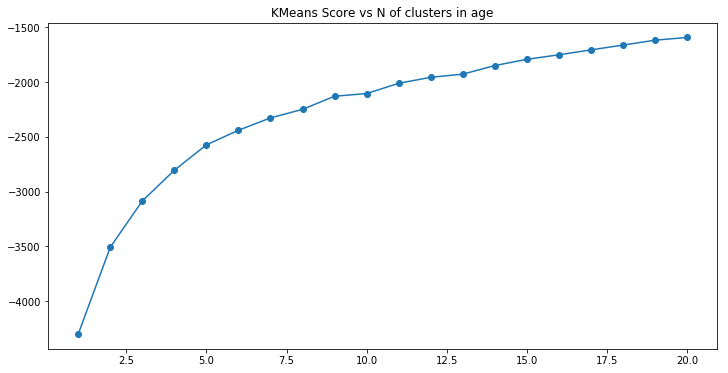

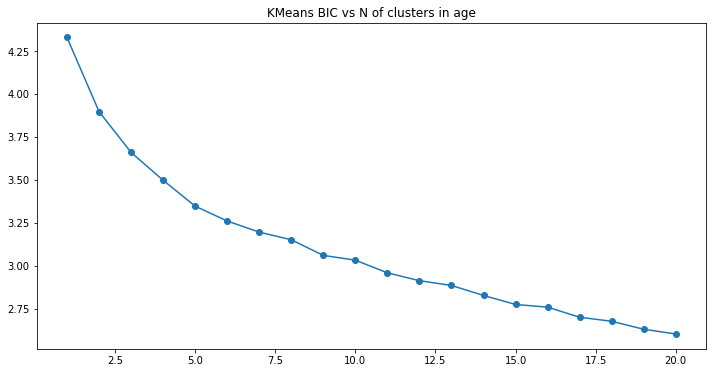

school_grade
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.334592
1             2        3552.280930    -3552.280930     3.935450
2             3        3229.899528    -3229.899528     3.742524
3             4        2940.582885    -2940.582885     3.582954
4             5        2728.418238    -2728.418238     3.470134
5             6        2611.760957    -2611.760957     3.389548
6             7        2504.555757    -2504.555757     3.326273
7             8        2424.116936    -2424.116936     3.269847
8             9        2332.666438    -2332.666438     3.191519
9            10        2298.449648    -2298.449648     3.182270


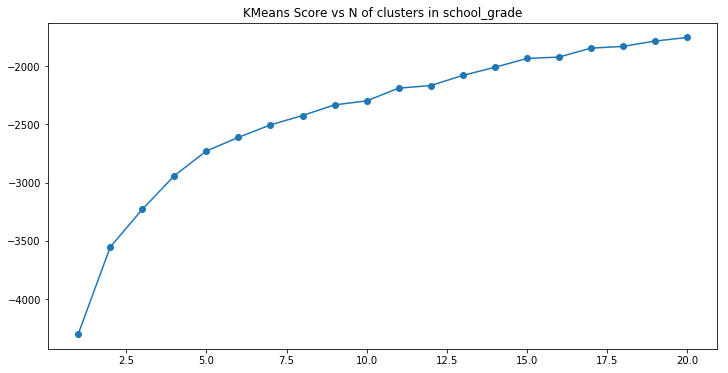

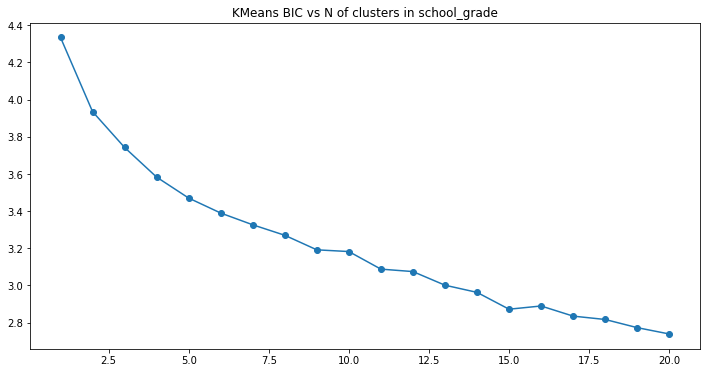

gender
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.248999
1             2        3400.097537    -3400.097537     3.830033
2             3        3003.199003    -3003.199003     3.590065
3             4        2770.936470    -2770.936470     3.434047
4             5        2590.266389    -2590.266389     3.347654
5             6        2439.794293    -2439.794293     3.232712
6             7        2342.432027    -2342.432027     3.186461
7             8        2223.281374    -2223.281374     3.114519
8             9        2152.040975    -2152.040975     3.052496
9            10        2050.367829    -2050.367829     2.962957


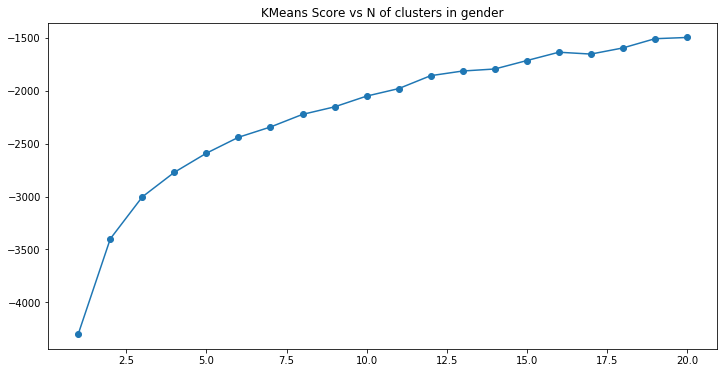

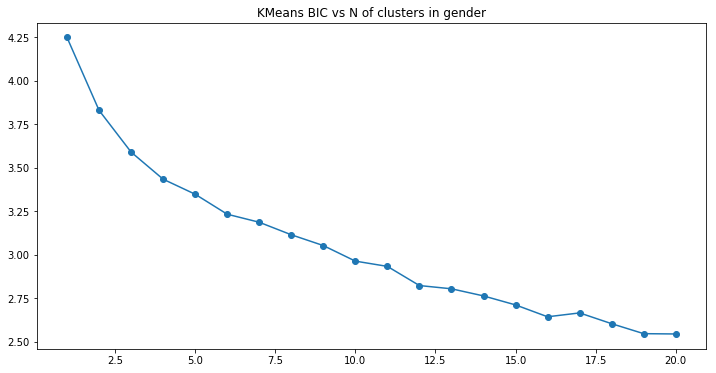

attentional_amplitude
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.246040
1             2        3746.903965    -3746.903965     3.985780
2             3        3373.008723    -3373.008723     3.756956
3             4        3078.631653    -3078.631653     3.580864
4             5        2897.359140    -2897.359140     3.490706
5             6        2773.879193    -2773.879193     3.408339
6             7        2625.968321    -2625.968321     3.324781
7             8        2478.474309    -2478.474309     3.222191
8             9        2349.683727    -2349.683727     3.150898
9            10        2292.116553    -2292.116553     3.085275


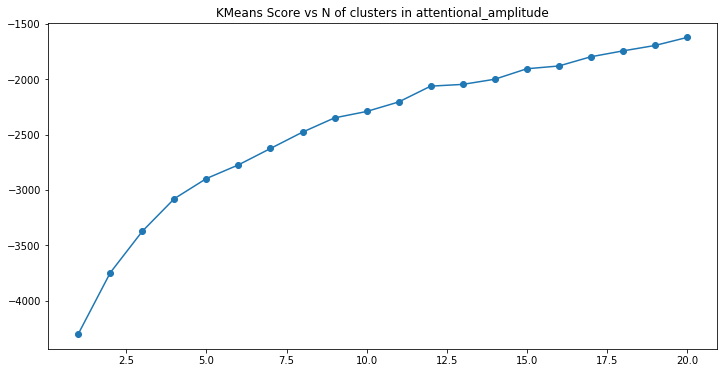

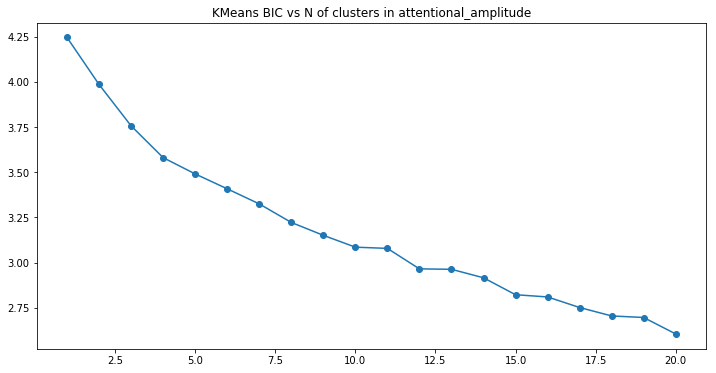

audio_verbal_work_memory
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.285654
1             2        3674.118126    -3674.118126     3.960497
2             3        3195.172621    -3195.172621     3.688266
3             4        2931.753153    -2931.753153     3.536377
4             5        2763.173509    -2763.173509     3.433747
5             6        2613.539644    -2613.539644     3.336102
6             7        2445.684290    -2445.684290     3.251968
7             8        2336.187157    -2336.187157     3.159417
8             9        2223.687970    -2223.687970     3.081046
9            10        2132.624279    -2132.624279     3.014717


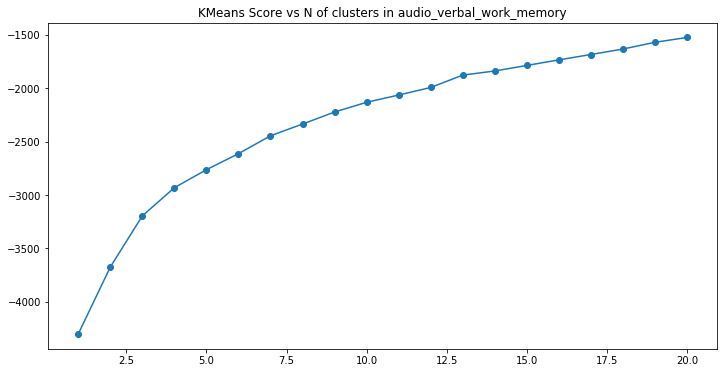

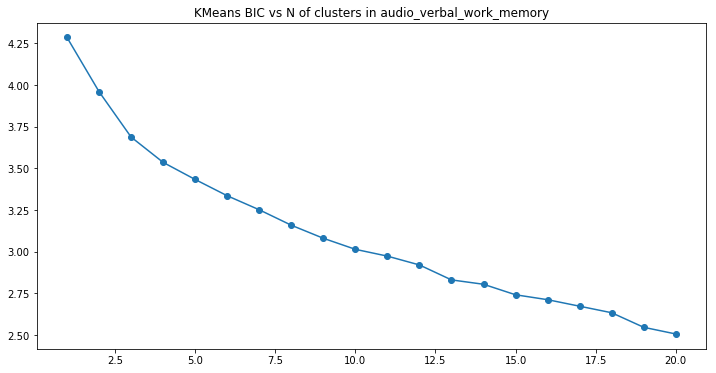

encoded_audioverbal_memory
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.209642
1             2        3616.786142    -3616.786142     3.905162
2             3        3105.223353    -3105.223353     3.610316
3             4        2844.872082    -2844.872082     3.468643
4             5        2652.209870    -2652.209870     3.341966
5             6        2472.957775    -2472.957775     3.230756
6             7        2352.329377    -2352.329377     3.134862
7             8        2244.667730    -2244.667730     3.075581
8             9        2202.185456    -2202.185456     3.026413
9            10        2095.515228    -2095.515228     2.954963


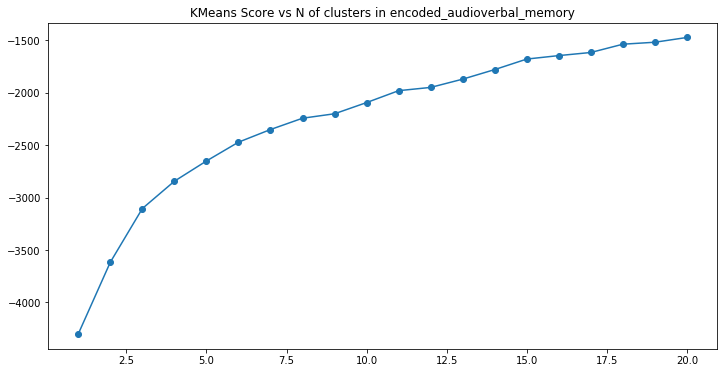

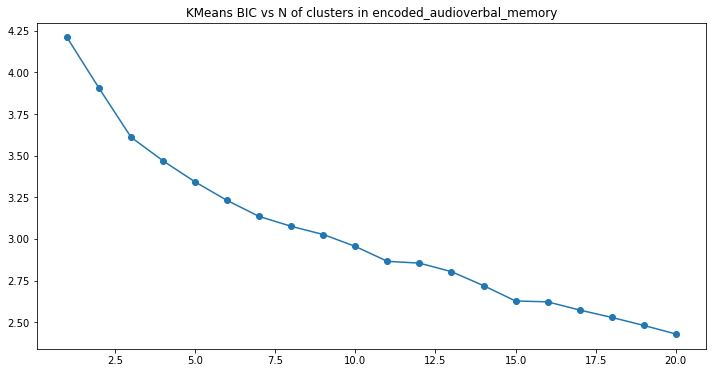

visual_memory
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.272907
1             2        3609.673222    -3609.673222     3.879564
2             3        3198.946869    -3198.946869     3.632194
3             4        2946.280090    -2946.280090     3.502849
4             5        2777.137953    -2777.137953     3.404681
5             6        2577.703030    -2577.703030     3.278642
6             7        2429.295295    -2429.295295     3.187881
7             8        2325.104603    -2325.104603     3.140617
8             9        2233.791047    -2233.791047     3.070121
9            10        2083.157004    -2083.157004     2.960629


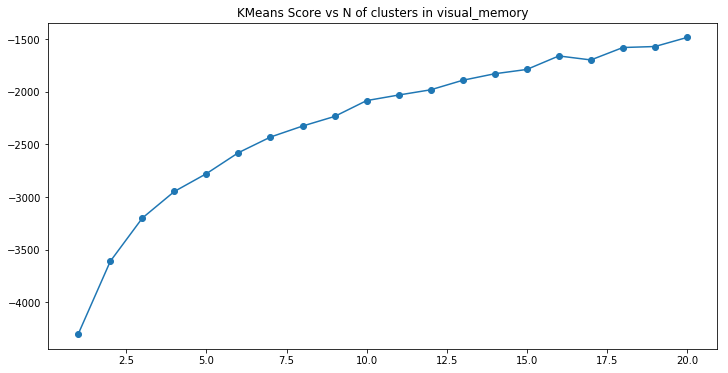

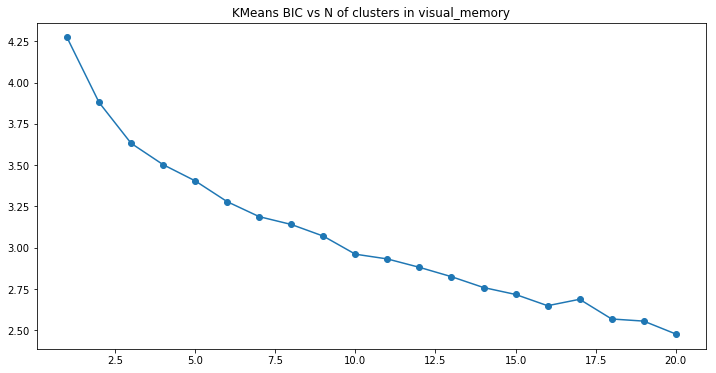

audioverbal_memory
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.225176
1             2        3542.498766    -3542.498766     3.875762
2             3        3127.318072    -3127.318072     3.645308
3             4        2836.864966    -2836.864966     3.449729
4             5        2564.836780    -2564.836780     3.297083
5             6        2391.831695    -2391.831695     3.197979
6             7        2263.228149    -2263.228149     3.105028
7             8        2157.053911    -2157.053911     3.022183
8             9        2096.797227    -2096.797227     2.984914
9            10        1997.780565    -1997.780565     2.941838


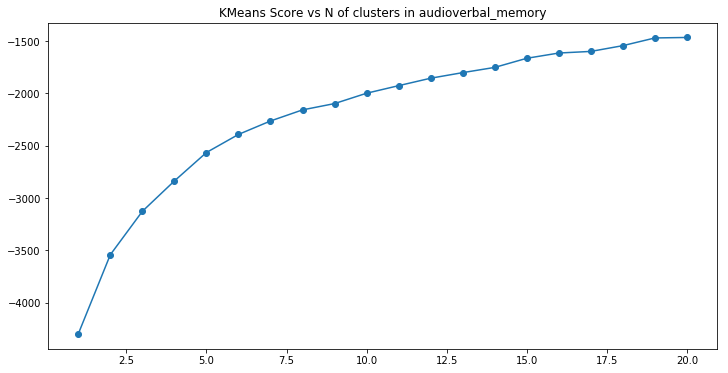

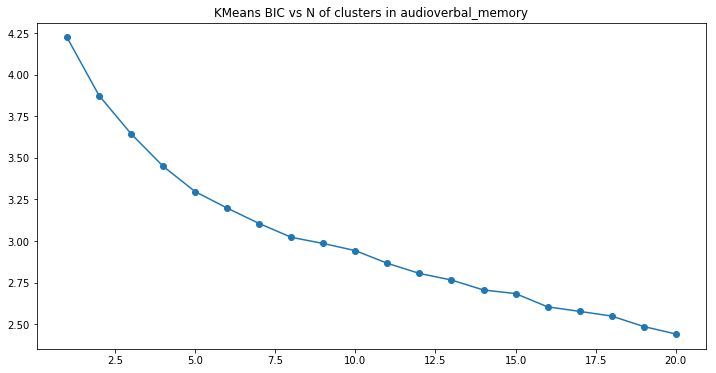

selective_attention
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.234468
1             2        3725.790343    -3725.790343     3.899217
2             3        3342.970798    -3342.970798     3.676354
3             4        3020.590650    -3020.590650     3.600237
4             5        2702.272571    -2702.272571     3.413915
5             6        2563.826612    -2563.826612     3.320493
6             7        2356.041186    -2356.041186     3.180028
7             8        2256.397296    -2256.397296     3.133042
8             9        2133.401123    -2133.401123     3.014669
9            10        2038.037884    -2038.037884     2.964780


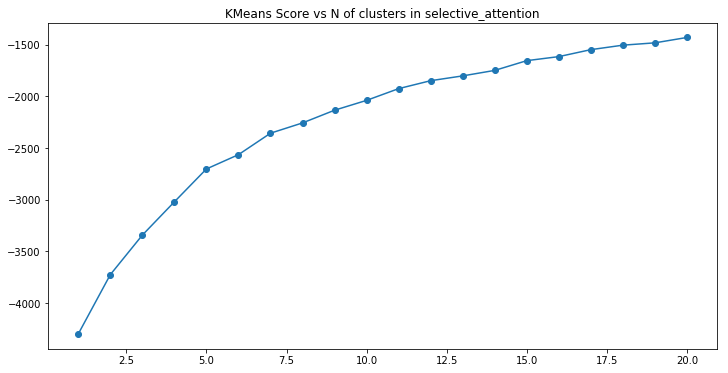

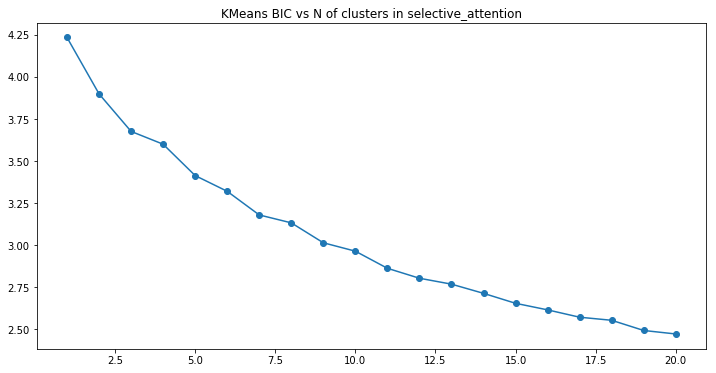

visual_memory.1
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.150818
1             2        3750.566455    -3750.566455     3.840347
2             3        3284.714231    -3284.714231     3.617508
3             4        2905.277994    -2905.277994     3.499624
4             5        2711.834160    -2711.834160     3.382045
5             6        2561.729416    -2561.729416     3.278982
6             7        2434.178994    -2434.178994     3.201361
7             8        2251.468525    -2251.468525     3.085380
8             9        2146.394652    -2146.394652     3.006035
9            10        2049.309795    -2049.309795     2.936555


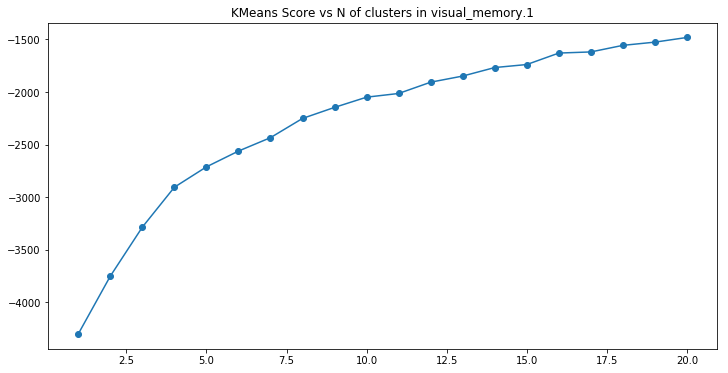

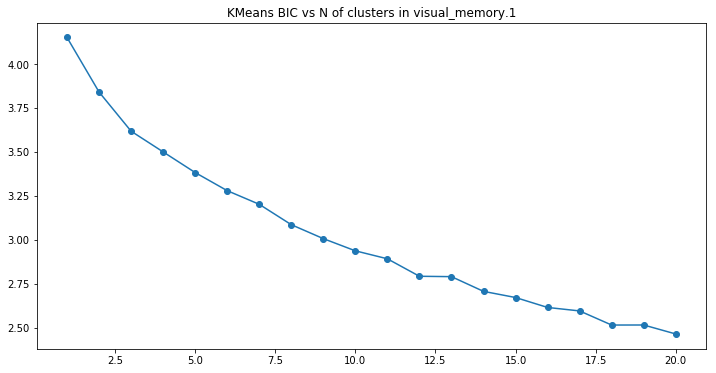

visual_espacial_amplitude
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.334899
1             2        3659.082121    -3659.082121     3.973955
2             3        3364.064583    -3364.064583     3.802162
3             4        3087.333184    -3087.333184     3.643674
4             5        2919.053718    -2919.053718     3.551795
5             6        2784.679295    -2784.679295     3.495928
6             7        2625.975467    -2625.975467     3.402673
7             8        2508.723678    -2508.723678     3.324108
8             9        2423.338150    -2423.338150     3.253657
9            10        2343.790922    -2343.790922     3.209557


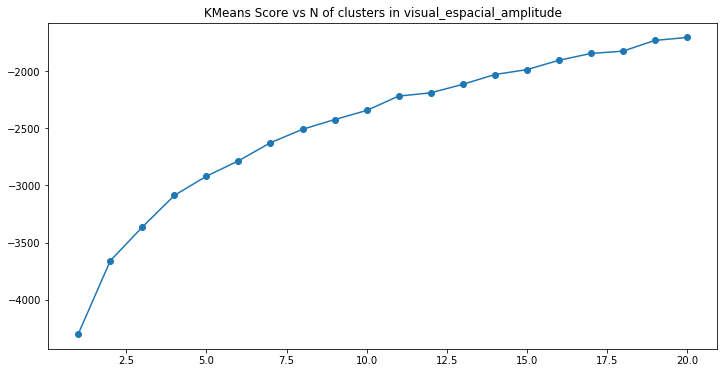

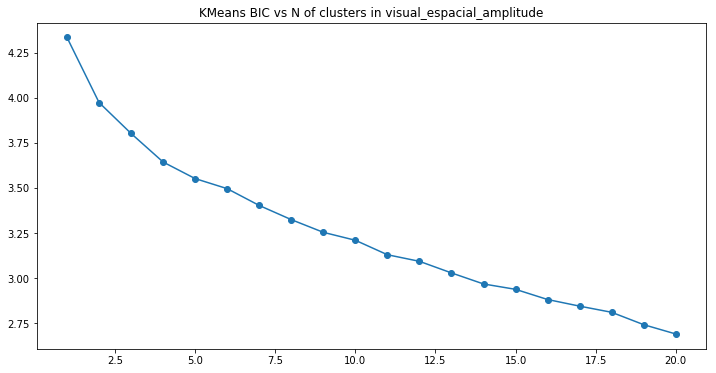

visual_espacial_work_memory
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.212030
1             2        3732.485930    -3732.485930     3.920028
2             3        3351.707507    -3351.707507     3.703298
3             4        3086.167126    -3086.167126     3.527382
4             5        2874.076257    -2874.076257     3.435452
5             6        2720.541587    -2720.541587     3.375147
6             7        2579.742994    -2579.742994     3.304776
7             8        2419.315189    -2419.315189     3.203761
8             9        2328.664905    -2328.664905     3.153998
9            10        2231.109915    -2231.109915     3.057454


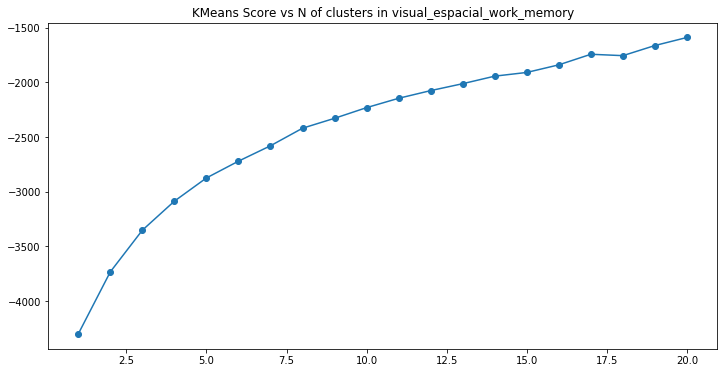

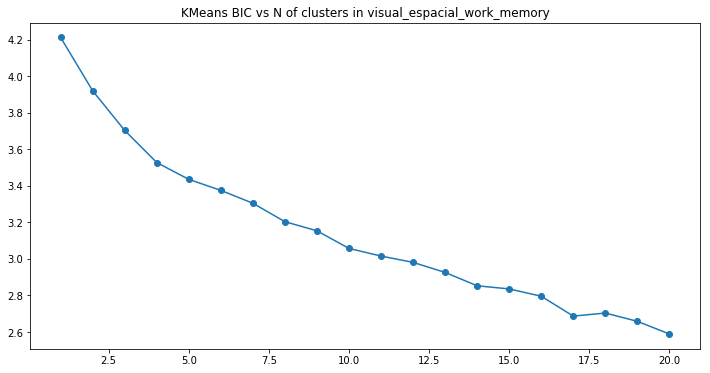

sustained_attention
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.294681
1             2        3484.074907    -3484.074907     3.842558
2             3        3165.773464    -3165.773464     3.666865
3             4        2901.433583    -2901.433583     3.509947
4             5        2706.298587    -2706.298587     3.405212
5             6        2557.691651    -2557.691651     3.326998
6             7        2421.951434    -2421.951434     3.255202
7             8        2306.004275    -2306.004275     3.162299
8             9        2234.125973    -2234.125973     3.078796
9            10        2141.808696    -2141.808696     3.033554


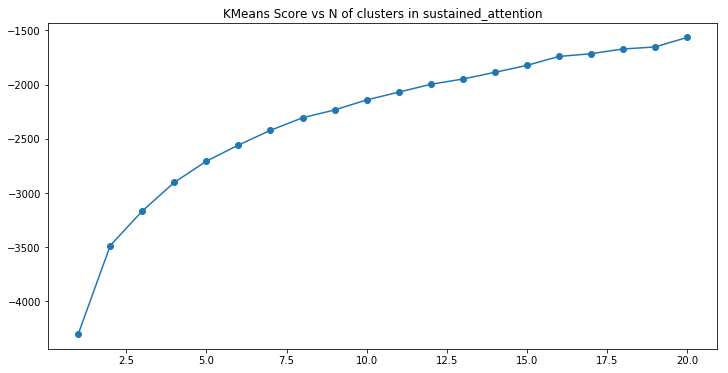

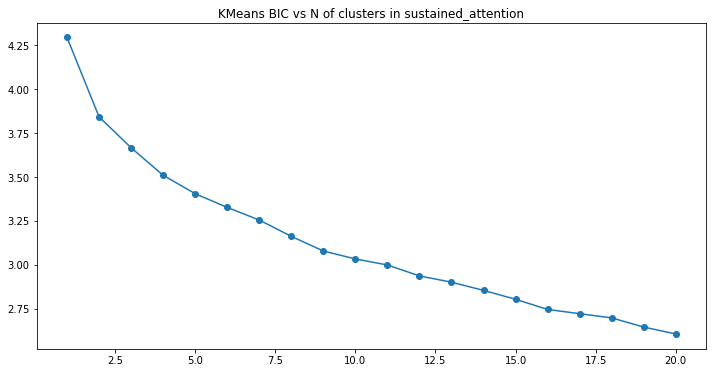

time_inhibitory_control
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.287445
1             2        3736.836721    -3736.836721     3.982228
2             3        3377.105255    -3377.105255     3.769916
3             4        3068.167455    -3068.167455     3.636021
4             5        2812.877081    -2812.877081     3.471889
5             6        2647.980434    -2647.980434     3.393427
6             7        2525.052368    -2525.052368     3.312035
7             8        2449.158493    -2449.158493     3.253530
8             9        2378.899427    -2378.899427     3.197297
9            10        2268.870139    -2268.870139     3.143774


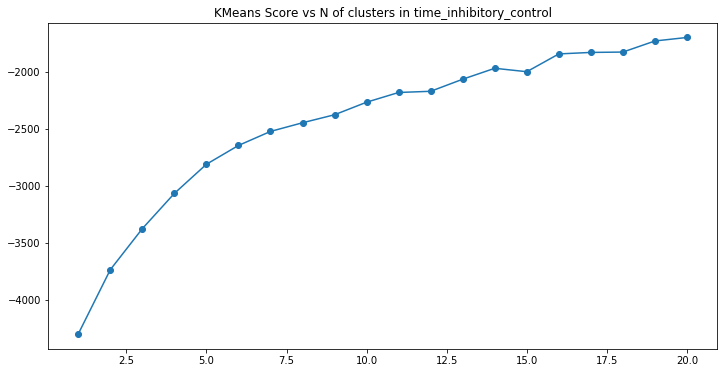

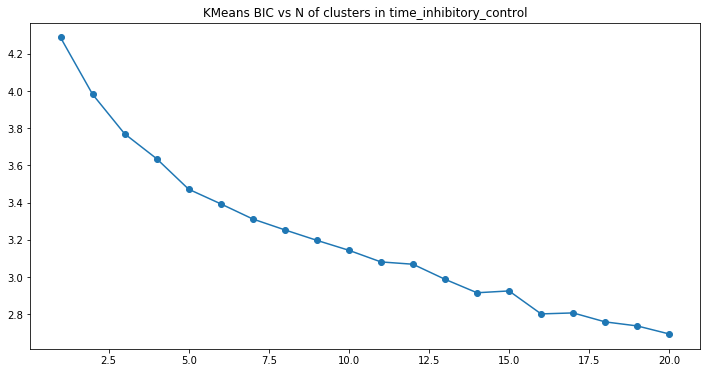

inhibitory_control_hit
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.281469
1             2        3570.512786    -3570.512786     3.907366
2             3        3172.407245    -3172.407245     3.683551
3             4        2894.972515    -2894.972515     3.528911
4             5        2670.276889    -2670.276889     3.374277
5             6        2493.798744    -2493.798744     3.292695
6             7        2325.855101    -2325.855101     3.188542
7             8        2177.833955    -2177.833955     3.072926
8             9        2122.390484    -2122.390484     3.020795
9            10        2029.058876    -2029.058876     2.964452


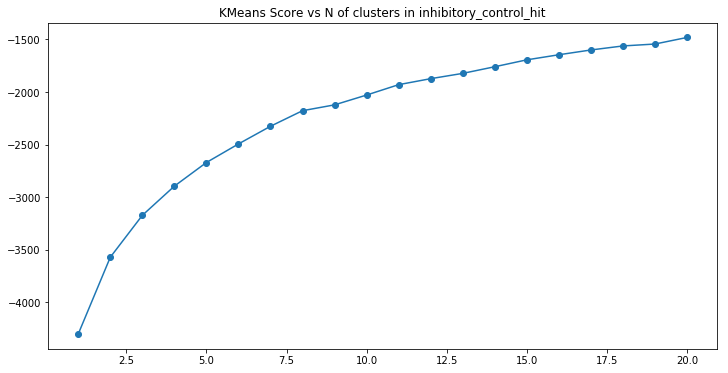

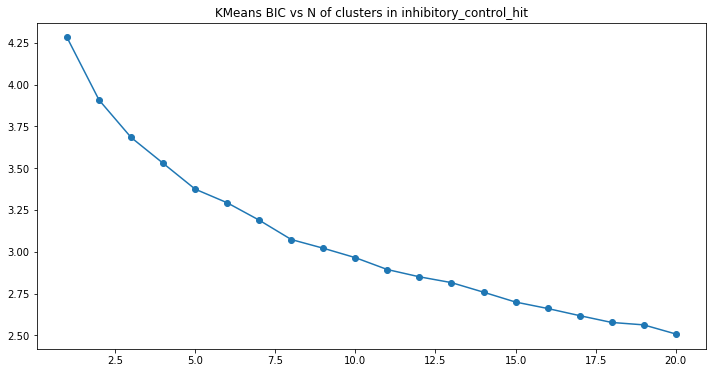

visual_synthesis
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.266614
1             2        3792.069739    -3792.069739     3.976548
2             3        3471.922800    -3471.922800     3.789121
3             4        3187.352073    -3187.352073     3.632210
4             5        2972.541445    -2972.541445     3.550509
5             6        2860.224476    -2860.224476     3.448220
6             7        2654.756850    -2654.756850     3.343869
7             8        2495.669629    -2495.669629     3.242856
8             9        2428.709438    -2428.709438     3.225519
9            10        2323.462500    -2323.462500     3.134024


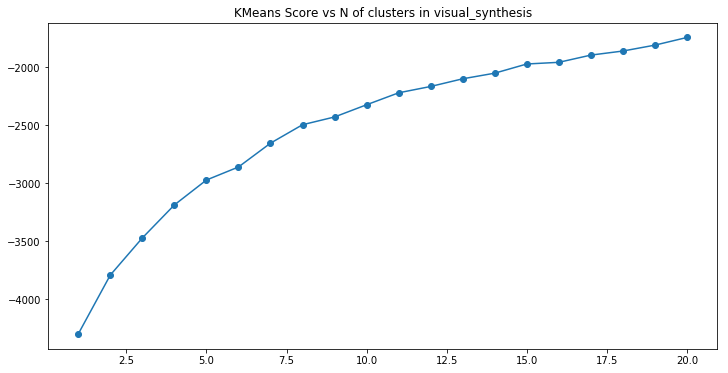

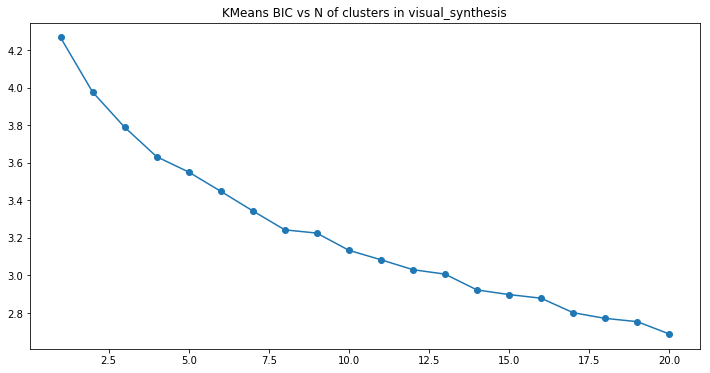

In [20]:
plot_all_interpretations_with_kmeans(big_df, big_df_corr, vars_in_game)

# KMeans Clustering on each variable

In [21]:
column = "attentional_amplitude"
positive_corr = big_df_corr[[column]].sort_values(by=column, ascending=True).head(10)
negative_corr = big_df_corr[[column]].sort_values(by=column, ascending=False).head(10)
indexes_names = list(positive_corr.index)+list(negative_corr.index)+list(["towi_id"])
indexes_values_df = big_df[indexes_names]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(indexes_values_df)
#pca = PCA(n_components=3)
#pca.fit(scaled_data)
#pca_df = pd.DataFrame(data = pca.transform(scaled_data), columns = ['PCA0', 'PCA1','PCA2'])

indexes_values_df.head(5)

,waitRoomMissed,unPackFourFirstSample2,reversePackScore,unPackRepeatedSample4,unPackGroupingSample4,unPackSpacialPrecisionSample2,totalDeadEnds (X),pUpCoinsTimeOfComp,unPackFourLastSample3,unPackCorrectSample-Curva,...,timeLab2,unPackCorrectSample1,latLab2,packTimeOfComp,unPackFourFirstSample1,unPackIncorrectSample-Intrus_3ensayos,unPackGroupingSample3,latLab4,unPack_TotalCorrect_3ensayos,towi_id
0,5,0,2,27,2.0,0,4.000000,89,0,3,...,16.622789,6,3.318488,320,25,1,1.0,2.751282,27,278
1,5,0,2,27,2.0,0,4.000000,89,0,3,...,16.622789,6,3.318488,320,25,1,1.0,2.751282,27,278
2,2,0,5,0,0.0,4,8.333333,187,0,6,...,57.421303,4,6.013690,542,50,3,2.0,5.400726,22,278
3,2,0,5,0,0.0,4,8.333333,187,0,6,...,57.421303,4,6.013690,542,50,3,2.0,5.400726,22,278
4,6,0,4,21,3.0,5,5.600000,109,0,6,...,30.044230,3,6.619316,457,0,1,3.0,4.668563,23,279


In [22]:
kmeans = KMeans(n_clusters=3, max_iter=300, n_init=3, random_state=100)
kmeans.fit(scaled_data)
kmeans.cluster_centers_

array([[ 1.33021179e+00, -3.21725459e-01, -3.79239601e-01,
         2.76766692e+00,  2.74966137e+00,  7.75092671e-02,
        -3.70646088e-02,  2.22858769e-02, -1.45455036e-01,
         4.08207169e-02, -1.44602120e+00, -9.64175279e-01,
         1.21198183e-01, -1.66892058e-01, -6.82680515e-01,
        -1.38260361e-01, -1.88090429e-02, -5.22931359e-01,
        -3.51970300e-02,  1.38042352e-01, -1.26267323e+00],
       [-1.80124270e-01, -1.53718236e-01, -6.64924213e-02,
        -3.28679795e-01, -3.45023531e-01,  8.36524196e-04,
        -3.42995530e-02, -2.20340037e-02, -1.45455036e-01,
        -4.94252671e-01,  1.96399974e-01,  1.31318801e-01,
         5.57199513e-01, -1.77301494e-02,  1.06255172e-02,
         3.72505576e-01, -1.58690616e-02,  4.04132385e-02,
         2.90613473e-03,  4.01099159e-01,  3.04373515e-01],
       [-9.14254833e-02,  4.38952405e-01,  2.75060942e-01,
        -2.87606760e-01, -2.46684964e-01, -2.92707830e-02,
         8.56235941e-02,  3.86478257e-02,  3.58945492e

In [23]:
kmeans.labels_

array([0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

# Linear regression

In [29]:
from sklearn.model_selection import train_test_split
column = "attentional_amplitude"
positive_corr = big_df_corr[[column]].sort_values(by=column, ascending=True).head(10)
negative_corr = big_df_corr[[column]].sort_values(by=column, ascending=False).head(10)
indexes_names = list(positive_corr.index)+list(negative_corr.index)
indexes_values_df = big_df[indexes_names]
#y = big_df[column]
y = kmeans.labels_
scaler = StandardScaler()
scaled_data = scaler.fit_transform(indexes_values_df)
#pca = PCA(n_components=3)
#pca.fit(scaled_data)
#pca_df = pd.DataFrame(data = pca.transform(scaled_data), columns = ['PCA0', 'PCA1','PCA2'])

indexes_values_df.head(5)
X_train, X_test, y_train, y_test = train_test_split(indexes_values_df, y, test_size=0.3, random_state=101)

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
predictions = lm.predict(X_test)
predictions

array([ 1.12687205,  1.14225379,  1.78344379,  0.93847614,  1.86753415,
        2.10378431,  1.24371142, -0.04000882,  0.88408905,  0.89469352,
        0.89441223, -0.1495119 ,  1.11724441,  2.03410919,  1.12615822,
        1.14480301,  1.01294942,  2.08960447,  1.09844473,  0.92052546,
        0.96178468,  1.14225379,  0.93713223,  0.84752767,  0.97434935,
        0.92650541,  2.06793982,  2.15110383,  1.06043181,  1.46377531,
        2.15110383,  1.30773376,  1.5659917 ,  0.83750568,  1.97833233,
        0.84226072, -0.15387771,  1.59086433,  1.30121542,  1.88736603,
        0.85613612,  1.12023004,  0.99811425, -0.79230885,  1.78344379,
       -0.1495119 ,  0.97434935,  0.93362538,  1.10057725,  0.84226072,
        1.14904864,  0.9152175 ,  1.1186574 ,  0.85613612,  1.01294942,
        2.12887414,  1.11724441,  1.28518412,  0.33591814,  1.21090703,
        1.37408879,  0.21507624, -0.25269327,  0.18498564,  1.08062243])

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test.astype(int), predictions.astype(int)))

             precision    recall  f1-score   support

          0       0.32      1.00      0.49         9
          1       0.73      0.54      0.62        41
          2       1.00      0.47      0.64        15

avg / total       0.74      0.58      0.61        65

